# Sommaire :


### <a href="#C1"> **Partie 1 : Contexte et Objectifs**</a>

 - Contexte
 - Objectifs

<b><hr></b>

### <a href="#C2"> **Partie 2 : Mise en place de l'espace de travail**</a>
 - <a href="#C21"> 2.1 Import des packages</a>
 - <a href="#C22"> 2.2 Repertoire de travail</a>
 - <a href="#C23"> 2.3 Import des datas frames</a>
 - <a href="#C24"> 2.4 Definir la variable cible</a>

<b><hr></b>

### <a href="#C3"> **Partie 3 : Data preparation**</a>
 - <a href="#C31"> 3.1 Gestion des outliers</a>
  - <a href="#C311"> 3.1.1 Boxplots</a>
 - <a href="#C32"> 3.2 Graphiques</a>
 - <a href="#C33"> 3.3 Transformation des variables</a>
 - <a href="#C34"> 3.4 Create X & y</a>
 - <a href="#C35"> 3.5 Train Test Split</a>
 - <a href="#C36"> 3.6 Label Encoder </a>
 - <a href="#C37"> 3.7 Feature Scaling </a>
    
<b><hr></b>
 
### <a href="#C4"> **Partie 4 : Modélisation**</a>
 - <a href="#C41"> 4.1 Dummy Estimator </a>
 - <a href="#C42"> 4.2 Model type </a>
 - <a href="#C43"> 4.3 Feature Selection </a>
 - <a href="#C44"> 4.4 Model Selection </a>
 - <a href="#C45"> 4.5 Fit best Model and get test score </a>
 - <a href="#C46"> 4.6 Save Model </a>
 
<b><hr></b>

### <a href="#C5"> **Partie 5 : Benchmark**</a>


</br>

</br>

</br>

</br>

# <a name="C1">**Partie 1 : Contexte et Objectifs**</a> 

Contexte 

Objectifs

<hr>

</br>

# <a name="C2"><font color='blue'>**Partie 2 : Mise en place de l'espace de travail**</font></a> 

### <a name="C21"><font color='blue'>2.1 Imports packages</font></a> 

###### <b><font color='blue'>2.1.0 Requirements</font></b>
- <b>Built-in</b>       : os, warnings
- <b>Data</b>           : pandas, numpy
- <b>Visualisations</b> : matplotlib, seaborn
- <b>Preprocessing</b>  : sklearn, scipy

###### <b><font color='blue'>2.1.1 Imports</font></b>

In [1]:
# Built-in
import os,warnings

# Data
import numpy as np
import pandas as pd

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

#Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer

# feature selection
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import entropy

# metrics
import sklearn as sk
from sklearn.metrics import auc,roc_curve,confusion_matrix

# Imputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Modele Selection
from sklearn.model_selection import KFold, train_test_split, cross_val_score, GridSearchCV

# Model
from sklearn import dummy
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.svm import LinearSVR,SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,BaggingRegressor,AdaBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor,VotingRegressor,HistGradientBoostingRegressor
from lightgbm import LGBMRegressor
import xgboost as xgb
from sklearn import kernel_ridge


C:\Users\eleor\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


###### <b><font color='blue'>2.1.2 Options</font></b>

In [2]:
#warnings.filterwarnings(action='ignore')
warnings.filterwarnings(action='once')

In [3]:
# option de cellule des pandas dataset
pd.set_option("display.max_rows", 200) #parametre le nombre de ligne affichable dans dataframe pandas
pd.set_option("expand_frame_repr", True) #permet de deplier les colonnes cachées
pd.set_option("display.max_columns",200 ) #permet d'afficher jusqu'à 200 colonnes dans une cellule

In [4]:
pd.set_option('max_colwidth', None)

### <a name="C22"><font color='blue'>2.2 Working directory</font></a> 

In [5]:
os.listdir()

['.ipynb_checkpoints',
 'ELEORE_Kevin_1_notebook_exploratoire_112022.ipynb',
 'ELEORE_Kevin_2_notebook_prediction_112022.ipynb',
 'ELEORE_Kevin_3_notebook_prediction_112022.ipynb',
 'ELEORE_Kevin_4_presentation_112022.pptx',
 'ELEORE_Kevin_Anticipez les besoins en consommation de bâtiments.zip',
 '~$ELEORE_Kevin_4_presentation_112022.pptx']

In [6]:
os.listdir('data/cleaned')

['df_cleaned.csv', 'df_cleaned_AllUse.csv', 'df_cleaned_imputer_encod.csv']

In [7]:
path = 'data/cleaned/'
# A completer
filename = "df_cleaned.csv"

### <a name="C23"><font color='blue'>2.3 Import DataFrames</font></a> 

In [8]:
# df_encod = pd.read_csv(path+'df_cleaned.csv',sep=';',index_col='OSEBuildingID')

df = pd.read_csv(path+filename,sep=';',index_col='OSEBuildingID')
#df['ZipCode'] = df.ZipCode.apply(int).apply(str)
df.head()

,BuildingType,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,FourthLargestPropertyUseType,FifthLargestPropertyUseType,SixthLargestPropertyUseType,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions,NumberofRooms,NbTotalUseType,Age,dist_mean,dist_mean_CDC,dist_mean_Neigh,Rate_GFABuilding,GFAperFloor
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NonResidential,Hotel,98101,7,downtown,hotel,void,void,void,void,void,47.61220,-122.33799,1.0,12.0,88434.0,0.0,88434.0,88434.0,0.0,0.0,60.000000,7456910.0,249.98,12.0,1.0,89.0,1.337395,1.273185,0.402721,1.000000,7369.500000
2,NonResidential,Hotel,98101,7,downtown,hotel,parking,restaurant,void,void,void,47.61317,-122.33393,1.0,11.0,103566.0,15064.0,88502.0,83880.0,15064.0,4622.0,61.000000,8664479.0,295.86,11.0,3.0,20.0,1.209663,1.406095,0.573195,0.854547,9415.090909
5,NonResidential,Hotel,98101,7,downtown,hotel,void,void,void,void,void,47.61412,-122.33664,1.0,10.0,61320.0,0.0,61320.0,61320.0,0.0,0.0,56.000000,6946800.5,286.43,10.0,1.0,90.0,1.110927,1.183644,0.617268,1.000000,6132.000000
8,NonResidential,Hotel,98121,7,downtown,hotel,parking,swimming pool,void,void,void,47.61375,-122.34047,1.0,18.0,175580.0,62000.0,113580.0,123445.0,68009.0,0.0,75.000000,14656503.0,505.01,18.0,3.0,36.0,1.219978,1.024299,0.615997,0.646885,9754.444444
9,NonResidential,Other,98101,7,downtown,grouping,void,void,void,void,void,47.61623,-122.33657,1.0,2.0,97288.0,37198.0,60090.0,88830.0,0.0,0.0,46.951391,12581712.0,301.81,2.0,1.0,17.0,0.877805,1.044282,0.851444,0.617651,48644.000000


In [9]:
df.drop(columns=['FourthLargestPropertyUseType'  ,'FifthLargestPropertyUseType','SixthLargestPropertyUseType'],
       inplace=True)

In [10]:
df.columns

Index(['BuildingType', 'PrimaryPropertyType', 'ZipCode', 'CouncilDistrictCode',
       'Neighborhood', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
       'Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions', 'NumberofRooms',
       'NbTotalUseType', 'Age', 'dist_mean', 'dist_mean_CDC',
       'dist_mean_Neigh', 'Rate_GFABuilding', 'GFAperFloor'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3101 entries, 1 to 50226
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     3101 non-null   object 
 1   PrimaryPropertyType              3101 non-null   object 
 2   ZipCode                          3101 non-null   object 
 3   CouncilDistrictCode              3101 non-null   int64  
 4   Neighborhood                     3101 non-null   object 
 5   LargestPropertyUseType           3101 non-null   object 
 6   SecondLargestPropertyUseType     3101 non-null   object 
 7   ThirdLargestPropertyUseType      3101 non-null   object 
 8   Latitude                         3101 non-null   float64
 9   Longitude                        3101 non-null   float64
 10  NumberofBuildings                3101 non-null   float64
 11  NumberofFloors                   3101 non-null   float64
 12  PropertyGFATotal   

### <a name="C24"><font color='blue'>2.4 Define Target Data</font></a> 

In [12]:
Target_data = 'TotalGHGEmissions'
df.drop(columns=['SiteEnergyUseWN(kBtu)'],inplace=True)

#### Suppression des lignes dont SiteEnergyUseWN(kBtu) sont NAs

In [13]:
df = df[df[Target_data].notna()]
df.shape

(3101, 28)

<hr>

</br>

# <a name="C3"><font color='teal'>**Partie 3 : Data preparation**</font></a> 

### <a name="C31"><font color='teal'>3.1 Gestion des outliers</font></a>

#### <a name="C311"><font color='teal'>3.1.1 Boxplots</font></a>

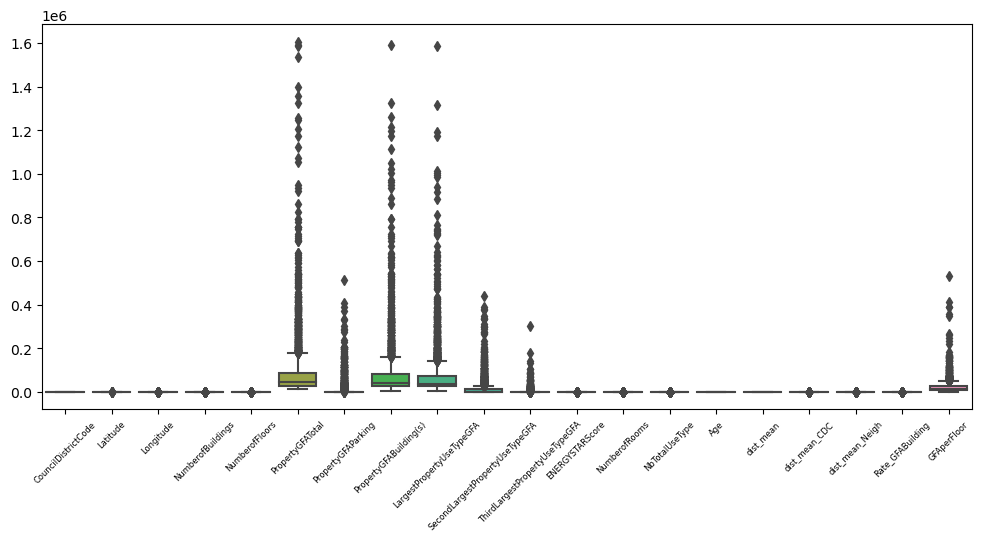

In [14]:
fig = plt.figure(figsize=(12, 5))
sns.boxplot(data = df.drop(columns=Target_data).select_dtypes(include=[np.number]) ,showfliers = True)
plt.xticks(rotation=45,size = 6);

<div class="alert alert-info">Les données comprennent encore beaucoups de valeurs extrèmes.<br>
J'utiliserai quantileTransforme pour traiter les outliers</div> 

In [15]:
df.columns

Index(['BuildingType', 'PrimaryPropertyType', 'ZipCode', 'CouncilDistrictCode',
       'Neighborhood', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
       'Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'TotalGHGEmissions', 'NumberofRooms', 'NbTotalUseType', 'Age',
       'dist_mean', 'dist_mean_CDC', 'dist_mean_Neigh', 'Rate_GFABuilding',
       'GFAperFloor'],
      dtype='object')

In [16]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

X_test = df.copy()

for col in ['PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA','GFAperFloor','Longitude']:
    #tandis que Yeo-Johnson prend en charge les données positives ou négatives.
    yj = PowerTransformer(method="yeo-johnson")
    qt = QuantileTransformer(output_distribution="normal")
    
    # perform power transforms and quantile transform
    X_test[col] = yj.fit_transform( X_test[col].values.reshape(-1,1) )
    #X_test[col] = qt.fit_transform( X_test[col].values.reshape(-1,1) )

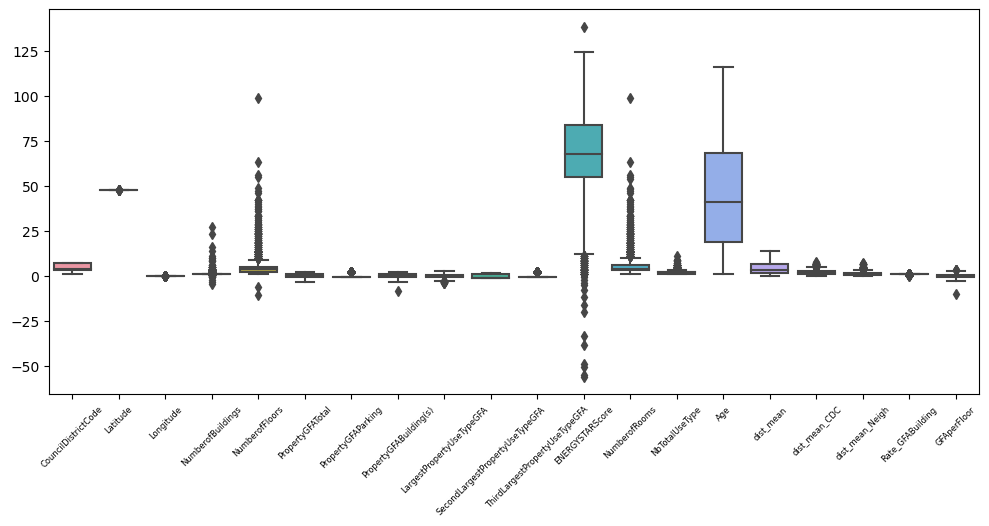

In [17]:
fig = plt.figure(figsize=(12, 5))
sns.boxplot(data = X_test.drop(columns=Target_data).select_dtypes(include=[np.number]) ,showfliers = True)
plt.xticks(rotation=45,size = 6);

In [18]:
X_test[col]

OSEBuildingID
1       -1.385003e-14
2        5.800915e-15
5       -7.299716e-15
8       -2.586820e-14
9       -6.966649e-15
             ...     
50221   -1.901257e-13
50223    5.959122e-14
50224   -1.099676e-13
50225    5.243028e-14
50226    1.928457e-13
Name: Longitude, Length: 3101, dtype: float64

### <a name="C32"><font color='teal'> 3.2 Graphiques</font></a>

#### <font color='teal'> 3.2.1 Histogramme</font>

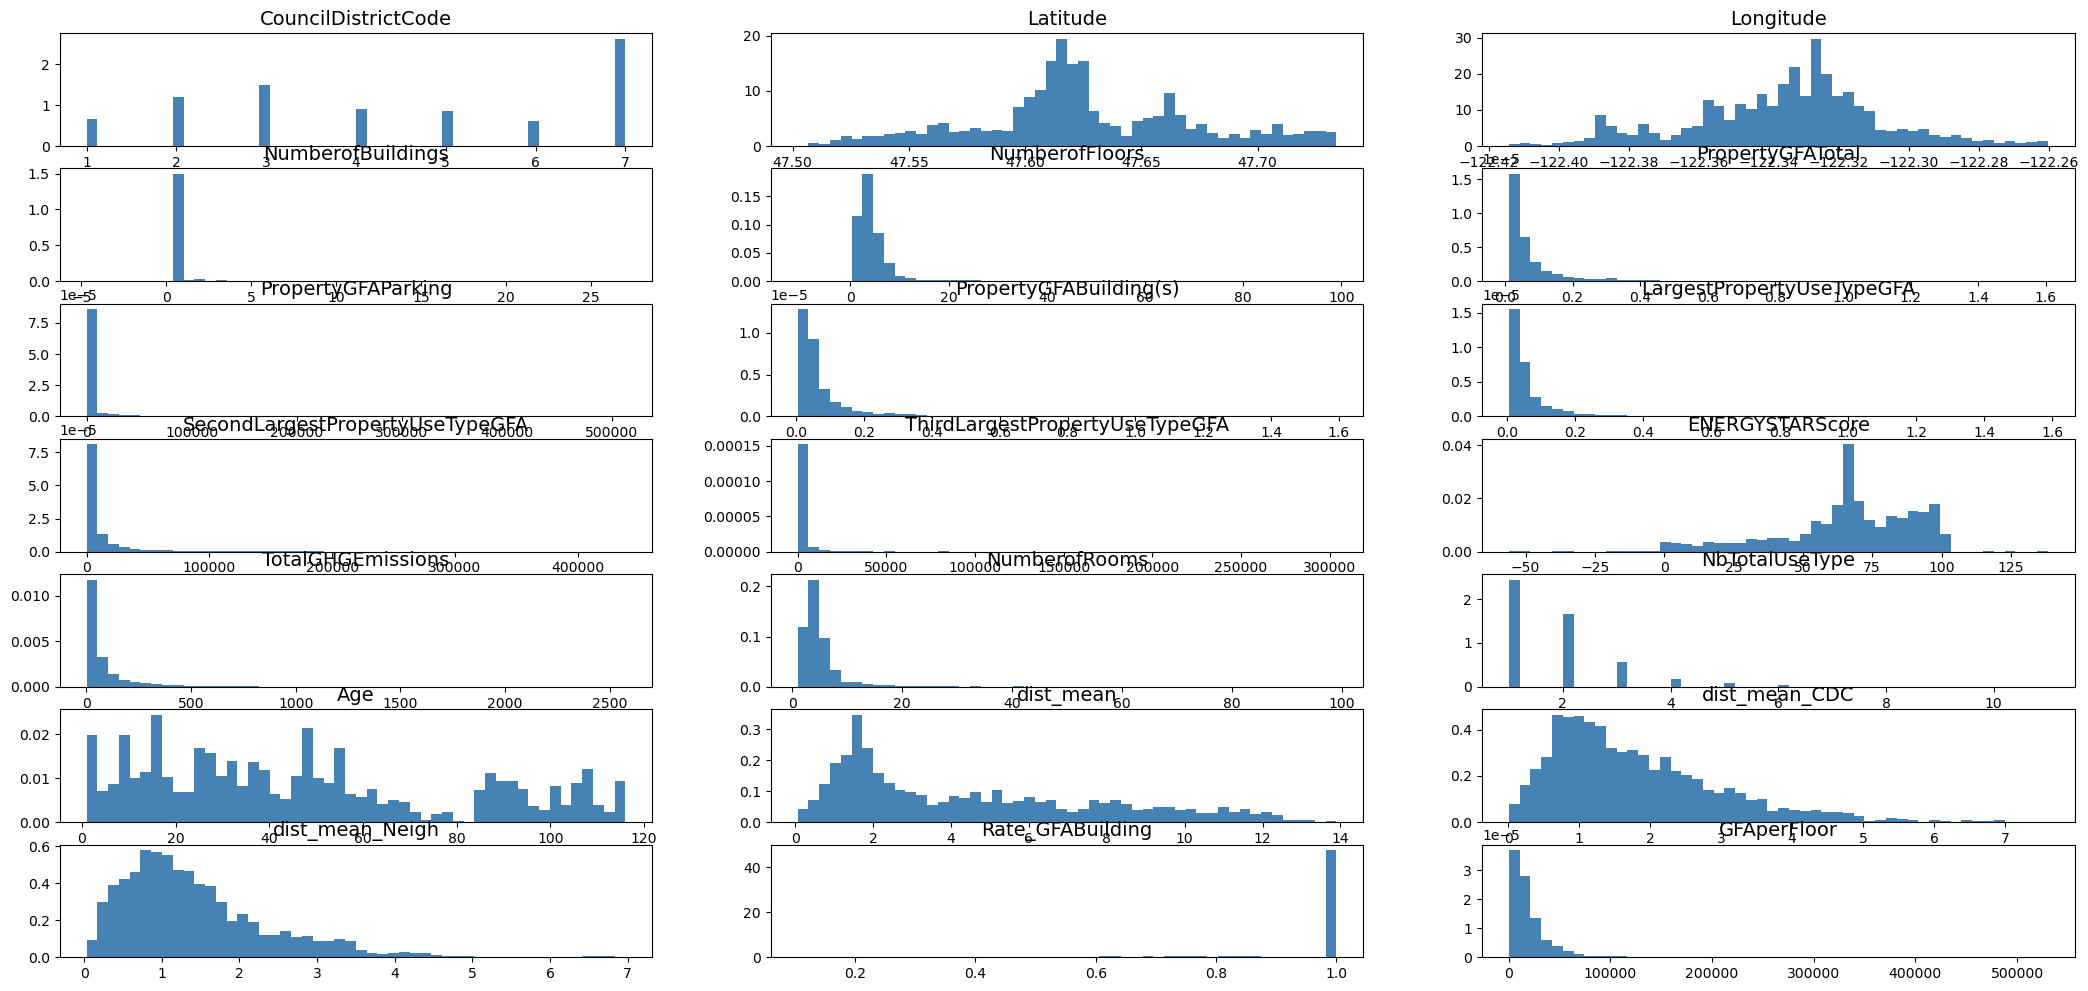

In [19]:
fig = plt.figure(figsize=(26, 12))
X_g = df.select_dtypes(include=np.number)
for feat_idx in range(X_g.shape[1]):
    ax = fig.add_subplot(7,3, (feat_idx+1))
    h = ax.hist(X_g.iloc[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(X_g.columns[feat_idx], fontsize=14)
    
del X_g

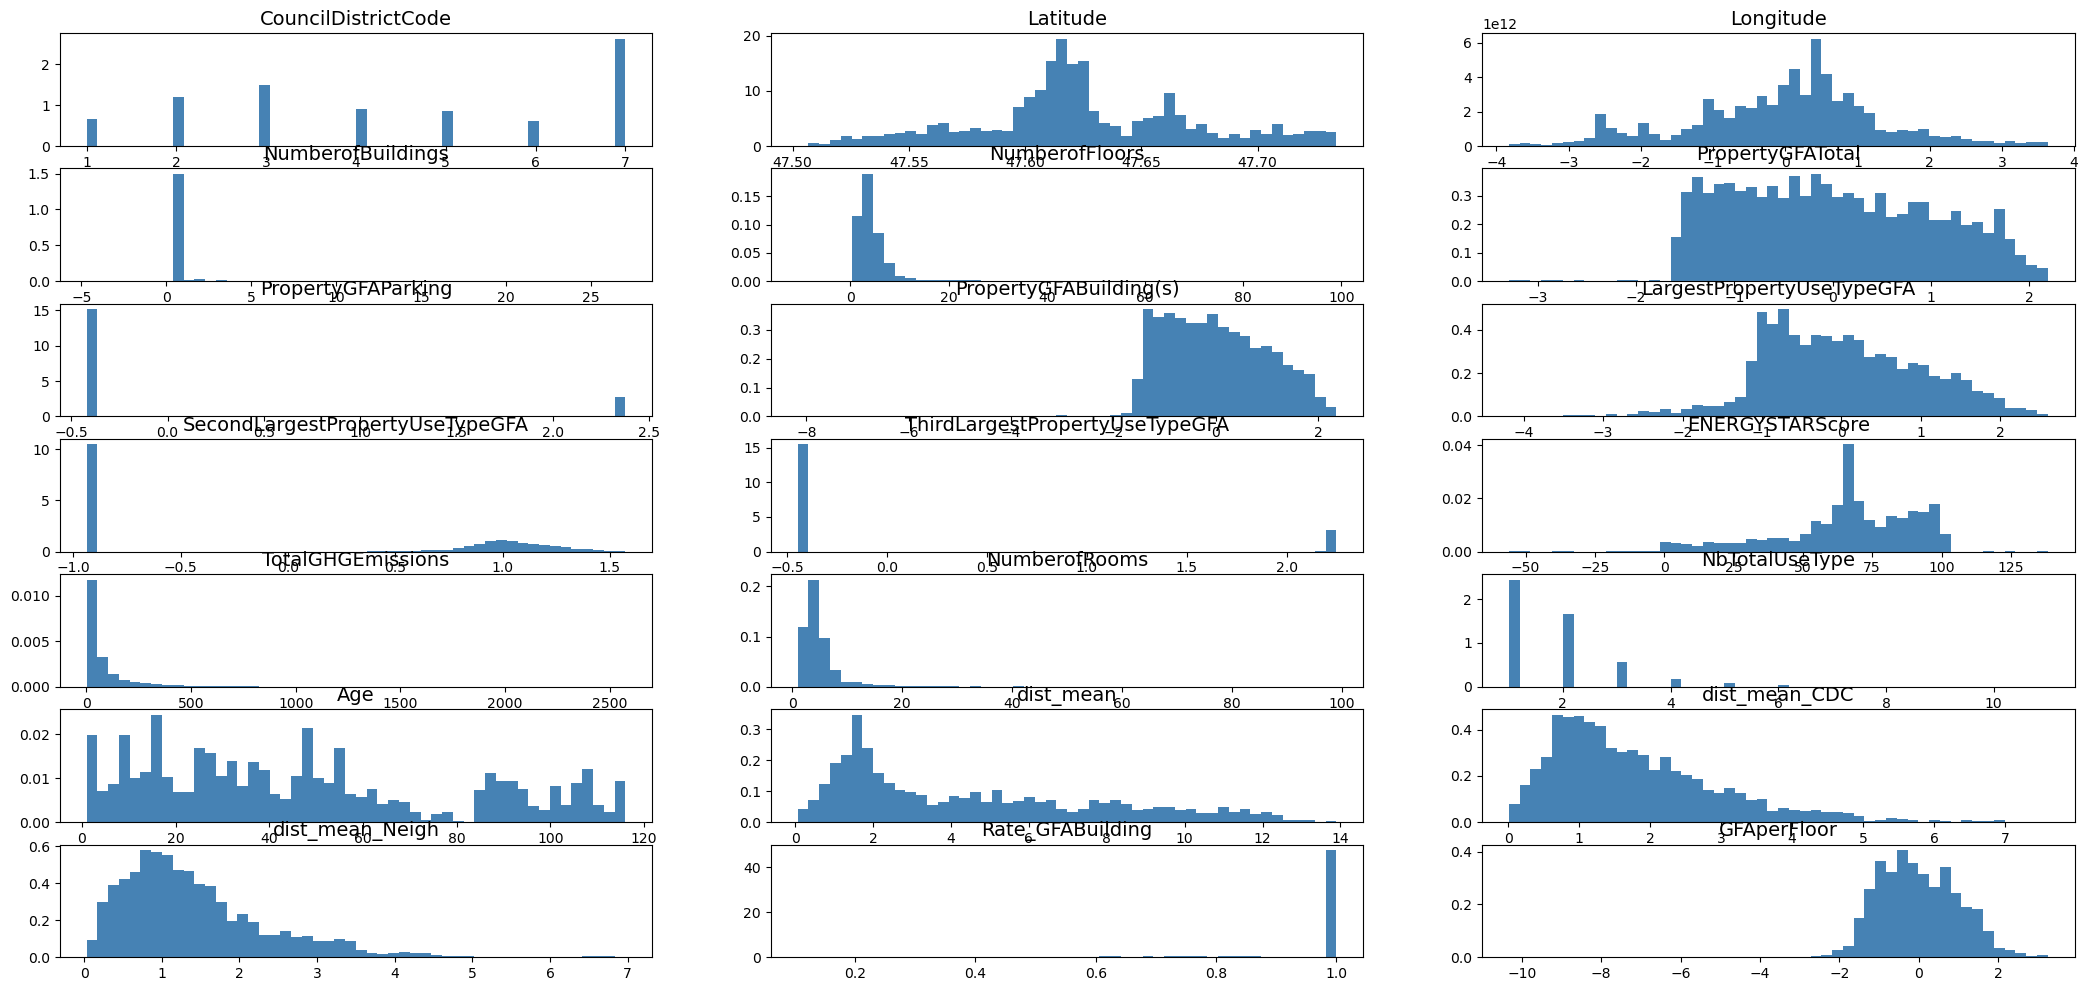

In [20]:
fig = plt.figure(figsize=(26, 12))
X_g = X_test.select_dtypes(include=np.number)
for feat_idx in range(X_g.shape[1]):
    ax = fig.add_subplot(7,3, (feat_idx+1))
    h = ax.hist(X_g.iloc[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(X_g.columns[feat_idx], fontsize=14)
    
del X_g

#### <font color='teal'> 3.2.2 Pairplot</font>

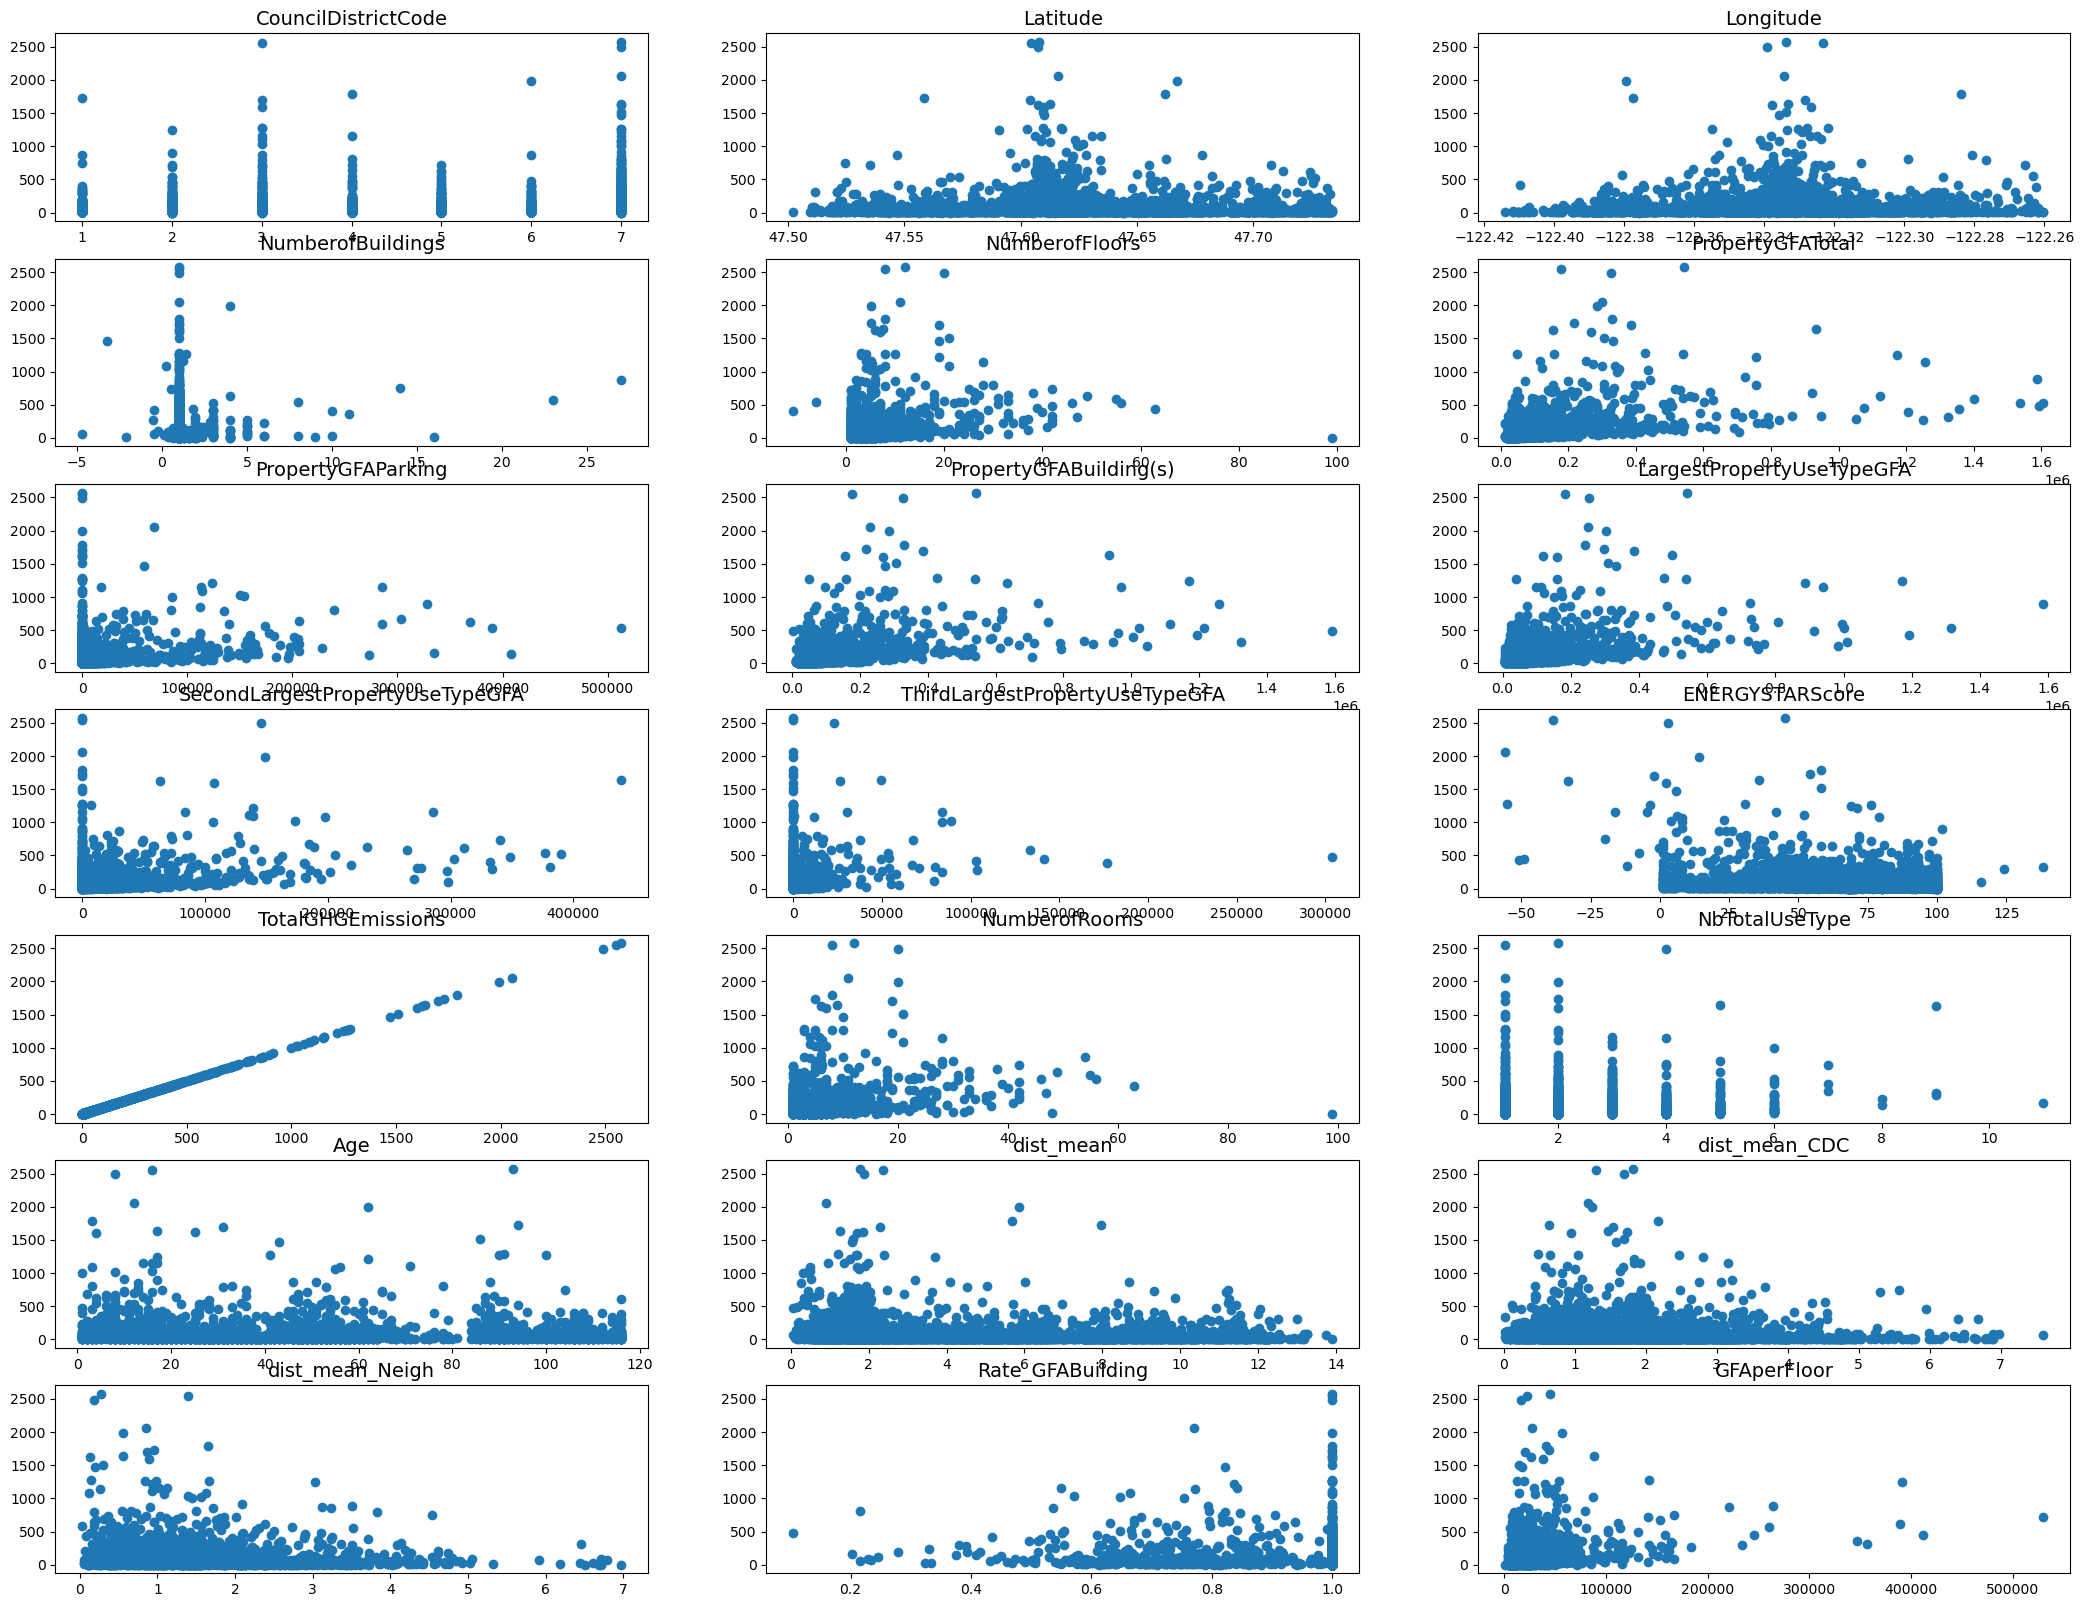

In [21]:
fig = plt.figure(figsize=(26, 20))
X_g = df.select_dtypes(include=np.number)

#X_g['pourc_PropertyGFAParking'] = X_g['PropertyGFAParking']/X_g['PropertyGFATotal']
#X_g['pourc_PropertyGFABuilding'] = X_g['PropertyGFABuilding(s)']/X_g['PropertyGFATotal']

for feat_idx in range(X_g.shape[1]):
    ax = fig.add_subplot(7,3, (feat_idx+1))
    h = ax.scatter(X_g.iloc[:, feat_idx],X_g[Target_data] )
    ax.set_title(X_g.columns[feat_idx], fontsize=14)
    
del X_g

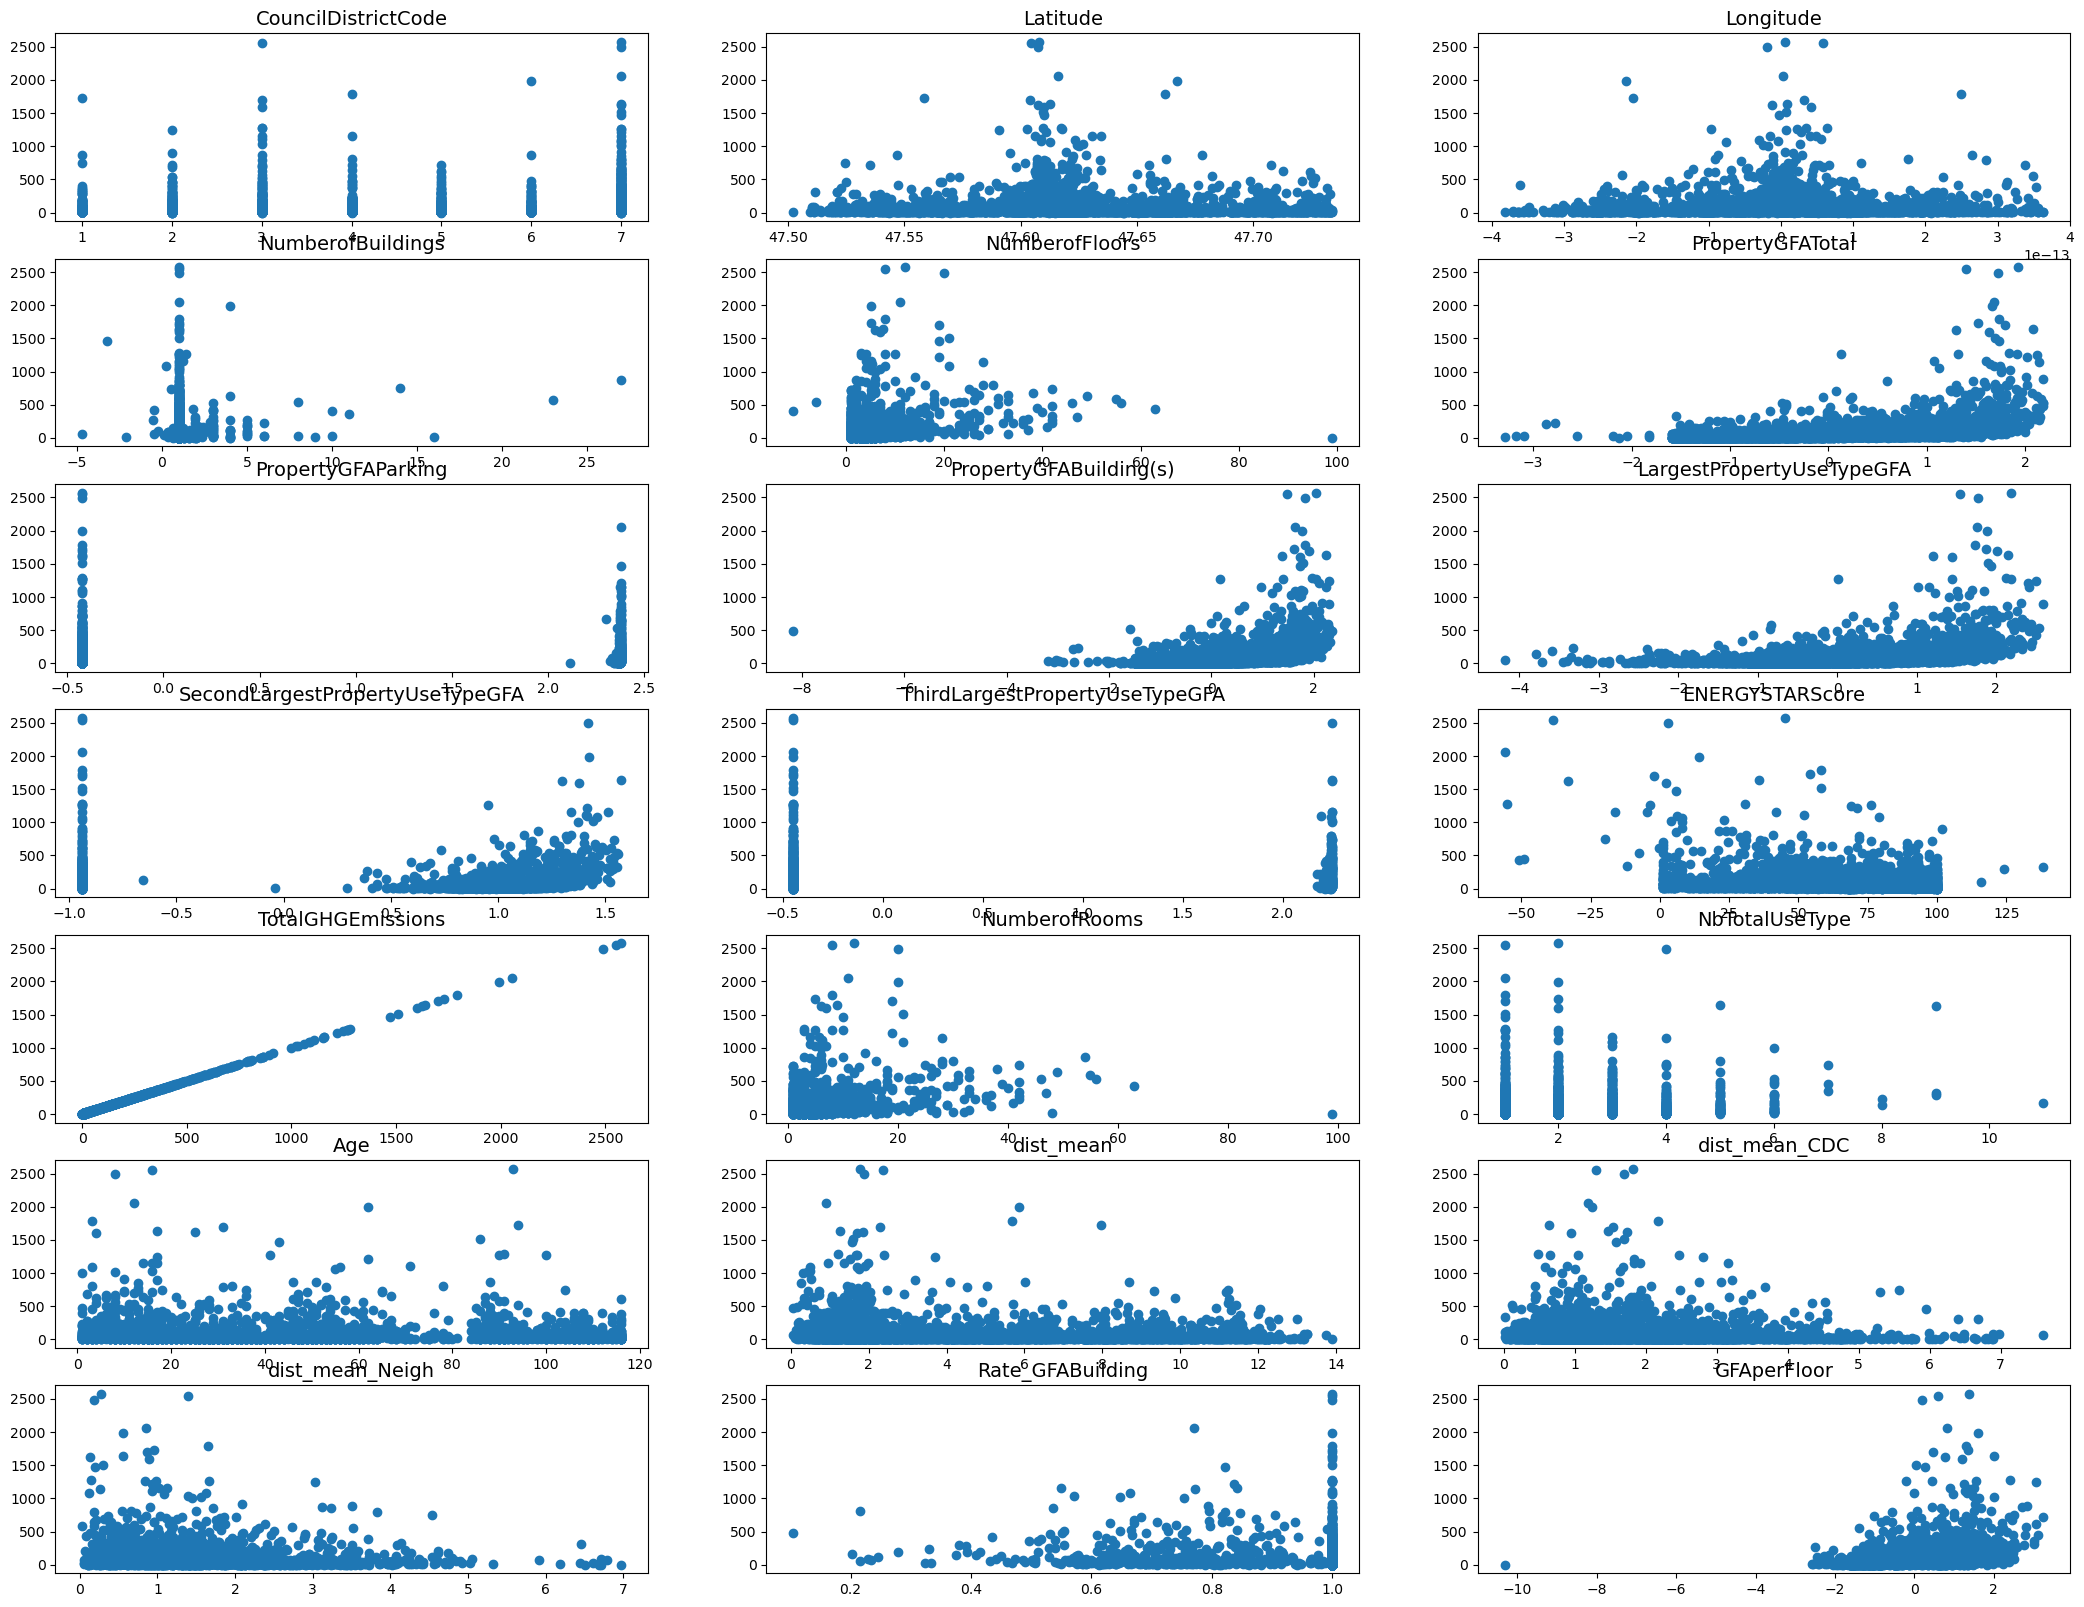

In [22]:
fig = plt.figure(figsize=(26, 20))
X_g = X_test.select_dtypes(include=np.number)

#X_g['pourc_PropertyGFAParking'] = X_g['PropertyGFAParking']/X_g['PropertyGFATotal']
#X_g['pourc_PropertyGFABuilding'] = X_g['PropertyGFABuilding(s)']/X_g['PropertyGFATotal']

for feat_idx in range(X_g.shape[1]):
    ax = fig.add_subplot(7,3, (feat_idx+1))
    h = ax.scatter(X_g.iloc[:, feat_idx],X_g[Target_data] )
    ax.set_title(X_g.columns[feat_idx], fontsize=14)
    
del X_g

In [23]:
np.corrcoef(np.log1p(X_test[Target_data]), X_test.LargestPropertyUseTypeGFA)

array([[1.        , 0.57338843],
       [0.57338843, 1.        ]])

In [24]:
np.corrcoef(np.log1p(df[Target_data]), df.LargestPropertyUseTypeGFA)

array([[1.        , 0.50086277],
       [0.50086277, 1.        ]])

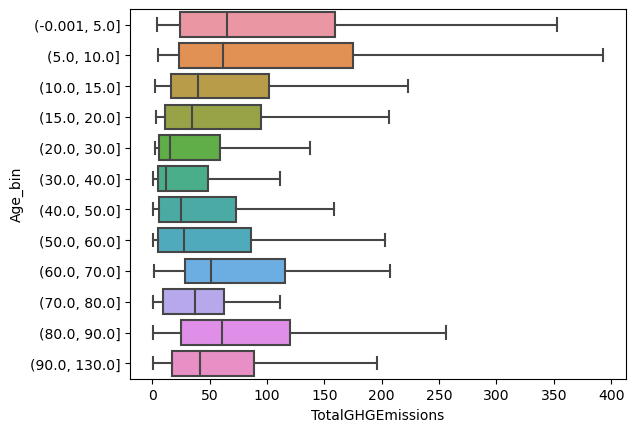

In [25]:
X_num_to_test = df.select_dtypes(include=np.number).copy()
X_num_to_test['Age_bin'] = pd.cut(X_num_to_test.Age,bins=[0,5,10,15,20,30,40,50,60,70,80,90,130],include_lowest=True)
sns.boxplot(data=X_num_to_test,x = Target_data, y = 'Age_bin',showfliers=False);
del X_num_to_test

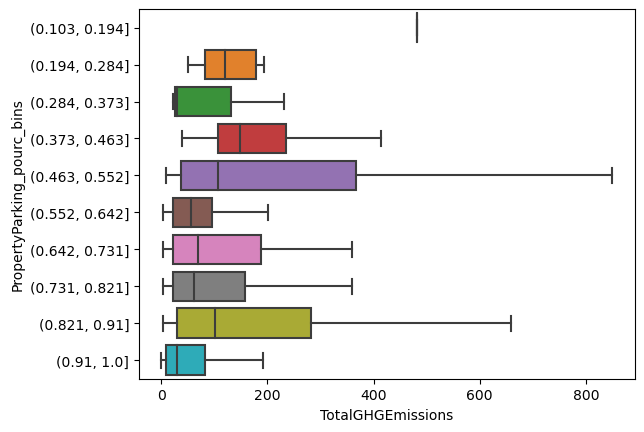

In [26]:
X_num_to_test = df.select_dtypes(include=np.number).copy()
X_num_to_test['PropertyBuilding_pourc'] = X_num_to_test['PropertyGFABuilding(s)']/X_num_to_test['PropertyGFATotal']
X_num_to_test['PropertyParking_pourc_bins'] = pd.cut(X_num_to_test.PropertyBuilding_pourc,bins=10,include_lowest=True)
sns.boxplot(data=X_num_to_test,x = Target_data, y = 'PropertyParking_pourc_bins',showfliers=False);
del X_num_to_test

<div class="alert alert-info">Les colonnes Neighborhood, ZipCode, PropertyGFAParking ne semblent pas importantes.</div> 

In [27]:
df[['TotalGHGEmissions',Target_data]].describe()

,TotalGHGEmissions,TotalGHGEmissions
count,3101.000000,3101.000000
mean,93.634028,93.634028
std,188.738934,188.738934
min,0.400000,0.400000
25%,9.650000,9.650000
50%,34.220000,34.220000
75%,94.020000,94.020000
max,2573.750000,2573.750000


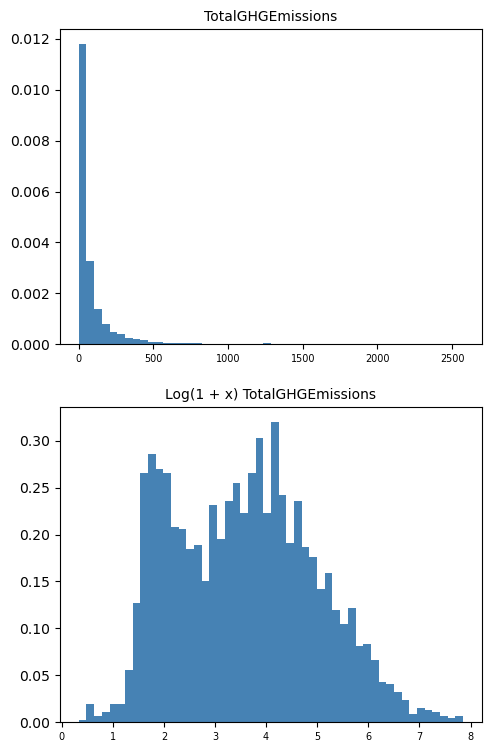

In [28]:
fig = plt.figure(figsize=(12, 9))

for idx,feat in enumerate([Target_data]):
    for i,tr in enumerate(['raw','log']):
        if tr == 'raw':
            ax = fig.add_subplot(2,2, (idx+i+1))
            h = ax.hist(df[feat], bins=50, color='steelblue', density=True, edgecolor='none')
            ax.set_title(feat, fontsize=10)
            ax.xaxis.set_tick_params(labelsize=7)
        else:
            ax = fig.add_subplot(2,2, (idx+i+2))
            h = ax.hist(np.log1p(df[feat]), bins=50, color='steelblue', density=True, edgecolor='none')
            ax.set_title('Log(1 + x) '+feat, fontsize=10)
            ax.xaxis.set_tick_params(labelsize=7)
            

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin
class CustomTransformerytology(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
        
    def fit(self, y, X=None):
        return self
    
    def transform(self, y, X=None):
        # Perform arbitary transformation
        return np.log1p(y)
    
    def inverse_transform(self,y, X=None):
        return np.expm1(y)

### <a name="C33"><font color='teal'>3.3 Feature Engenering</font></a> 

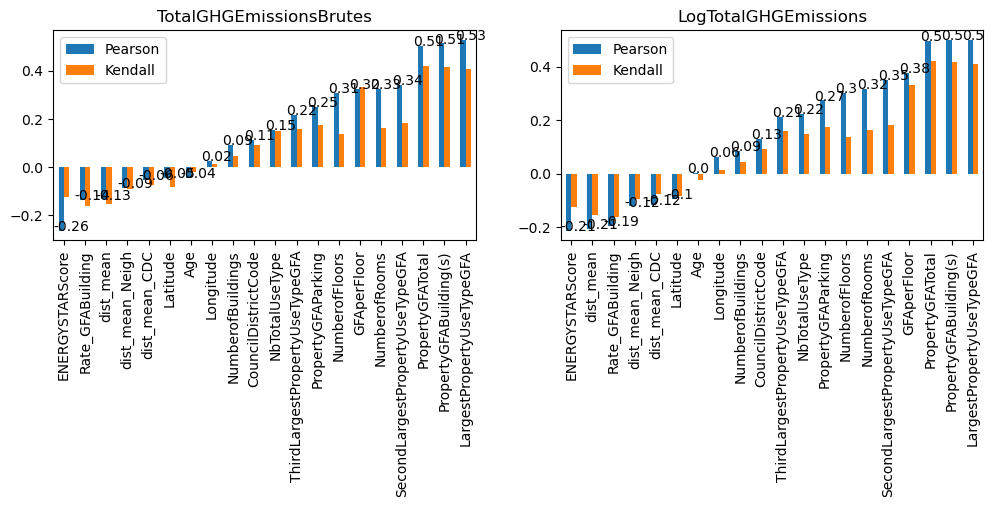

In [30]:
plt.figure(figsize=(12,6))
ax1 = plt.subplot(2, 2, 1)

pearson_values = df.corr()[[Target_data]]\
.sort_values(by = Target_data)\
.drop([Target_data])

kendall_values = df.corr(method = 'kendall')[[Target_data]]\
.sort_values(by = Target_data)\
.drop([Target_data])

pearson_values.rename(columns={'TotalGHGEmissions':'Pearson'})\
.join(kendall_values.rename(columns={'TotalGHGEmissions':'Kendall'}))\
.plot(y = ['Pearson','Kendall'],kind='bar',ax = ax1)

ax1.set_title(Target_data + "Brutes")
for id, val in enumerate(pearson_values[Target_data]): ax1.text(id-0.5, val, str(round(val,2)) )


    
    
ax2 = plt.subplot(2, 2, 2)

X_data = df.copy()
X_data['log_target'] = np.log1p(X_data[Target_data])

pearson_values = X_data.corr()[['log_target']]\
.sort_values(by = 'log_target')\
.drop([Target_data,'log_target'])

kendall_values = X_data.corr(method = 'kendall')[['log_target']]\
.sort_values(by = 'log_target')\
.drop([Target_data,'log_target'])

pearson_values.rename(columns={'log_target':'Pearson'})\
.join(kendall_values.rename(columns={'log_target':'Kendall'}))\
.plot(y = ['Pearson','Kendall'],kind='bar',ax = ax2)

ax2.set_title("Log" + Target_data)
for id, val in enumerate(pearson_values['log_target']): ax2.text(id-0.5, val, str(round(val,2)) )

    
    

In [31]:
# Score à battre
print("La correlation de perason à battre est :",round(np.max(pearson_values,axis=0)[0],2))

La correlation de perason à battre est : 0.5


### <a name="C34"><font color='teal'>3.4 Create X & y</font></a> 

In [32]:
X = df.dropna().drop(columns = [Target_data,'TotalGHGEmissions'])#.values ENERGYSTARScore
y = df.dropna()[Target_data]#.values
X.shape , y.shape

((3101, 27), (3101,))

In [33]:
X.head()

,BuildingType,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,NumberofRooms,NbTotalUseType,Age,dist_mean,dist_mean_CDC,dist_mean_Neigh,Rate_GFABuilding,GFAperFloor
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NonResidential,Hotel,98101,7,downtown,hotel,void,void,47.61220,-122.33799,1.0,12.0,88434.0,0.0,88434.0,88434.0,0.0,0.0,60.000000,12.0,1.0,89.0,1.337395,1.273185,0.402721,1.000000,7369.500000
2,NonResidential,Hotel,98101,7,downtown,hotel,parking,restaurant,47.61317,-122.33393,1.0,11.0,103566.0,15064.0,88502.0,83880.0,15064.0,4622.0,61.000000,11.0,3.0,20.0,1.209663,1.406095,0.573195,0.854547,9415.090909
5,NonResidential,Hotel,98101,7,downtown,hotel,void,void,47.61412,-122.33664,1.0,10.0,61320.0,0.0,61320.0,61320.0,0.0,0.0,56.000000,10.0,1.0,90.0,1.110927,1.183644,0.617268,1.000000,6132.000000
8,NonResidential,Hotel,98121,7,downtown,hotel,parking,swimming pool,47.61375,-122.34047,1.0,18.0,175580.0,62000.0,113580.0,123445.0,68009.0,0.0,75.000000,18.0,3.0,36.0,1.219978,1.024299,0.615997,0.646885,9754.444444
9,NonResidential,Other,98101,7,downtown,grouping,void,void,47.61623,-122.33657,1.0,2.0,97288.0,37198.0,60090.0,88830.0,0.0,0.0,46.951391,2.0,1.0,17.0,0.877805,1.044282,0.851444,0.617651,48644.000000


In [34]:
y.head()

OSEBuildingID
1    249.98
2    295.86
5    286.43
8    505.01
9    301.81
Name: TotalGHGEmissions, dtype: float64

### <a name="C35"><font color='teal'>3.5 Train Test Split</font></a> 

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=0)
print("Notre dataset d'entrainement est une matrice {} et la cible {}".format(X_train.shape,y_train.shape))
print("Notre dataset de test est une matrice au format {} et la cible {}".format(X_test.shape,y_test.shape) )

Notre dataset d'entrainement est une matrice (2170, 27) et la cible (2170,)
Notre dataset de test est une matrice au format (931, 27) et la cible (931,)


In [36]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

for col in ['PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA','GFAperFloor','Longitude']:
    #tandis que Yeo-Johnson prend en charge les données positives ou négatives.
    yj = PowerTransformer(method="yeo-johnson")
    qt = QuantileTransformer(output_distribution="normal")
    
    # perform power transforms and quantile transform
    yj.fit( X_train[col].values.reshape(-1,1) )
    X_train[col+'_PTyj'] = yj.transform( X_train[col].values.reshape(-1,1) )
    X_test[col+'_PTyj'] = yj.transform( X_test[col].values.reshape(-1,1) )
    #X_test[col] = qt.fit_transform( X_test[col].values.reshape(-1,1) )

### <a name="C36"><font color='teal'>3.6 Label Encoder</font></a> 

In [37]:
df.select_dtypes(exclude=np.number).nunique()

BuildingType                     6
PrimaryPropertyType             23
ZipCode                         26
Neighborhood                    13
LargestPropertyUseType          39
SecondLargestPropertyUseType    26
ThirdLargestPropertyUseType     21
dtype: int64

In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# regrpouper les modalité qui represente moins de 10 batiment dans une super modalité

# Create an instance of One-hot-encoder
ohe = OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore') #

# Transform X_train categorical
df_cat_train = ohe.fit_transform(X_train.select_dtypes(exclude=np.number) ) 
df_cat_train = pd.DataFrame(df_cat_train,
                            columns = ohe.get_feature_names_out(),
                            index = X_train.index)

# Create X_train encoded data 
X_train_encod = pd.merge(X_train.select_dtypes(include=np.number),
                        df_cat_train, left_index=True, right_index=True) 


# Transform X_test categorical
df_cat_test = ohe.transform(X_test.select_dtypes(exclude=np.number) ) 
df_cat_test = pd.DataFrame(df_cat_test,
                           columns = ohe.get_feature_names_out(),
                           index = X_test.index)

# Create X_test encoded data 
X_test_encod = pd.merge(X_test.select_dtypes(include=np.number),
                        df_cat_test, left_index=True, right_index=True) 


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [39]:
X_train_encod.head()

,CouncilDistrictCode,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,NumberofRooms,NbTotalUseType,Age,dist_mean,dist_mean_CDC,dist_mean_Neigh,Rate_GFABuilding,GFAperFloor,PropertyGFATotal_PTyj,PropertyGFAParking_PTyj,PropertyGFABuilding(s)_PTyj,LargestPropertyUseTypeGFA_PTyj,SecondLargestPropertyUseTypeGFA_PTyj,ThirdLargestPropertyUseTypeGFA_PTyj,GFAperFloor_PTyj,Longitude_PTyj,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_SPS-District K-12,PrimaryPropertyType_High-Rise Multifamily,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mid-Rise Multifamily,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,ZipCode_98102,ZipCode_98103,ZipCode_98104,ZipCode_98105,ZipCode_98106,ZipCode_98107,ZipCode_98108,ZipCode_98109,ZipCode_98112,ZipCode_98115,ZipCode_98116,ZipCode_98117,ZipCode_98118,ZipCode_98119,ZipCode_98121,ZipCode_98122,ZipCode_98125,ZipCode_98126,ZipCode_98133,ZipCode_98134,ZipCode_98136,ZipCode_98144,ZipCode_98195,ZipCode_98199,ZipCode_grouping,Neighborhood_central,Neighborhood_delridge,Neighborhood_downtown,Neighborhood_east,Neighborhood_greater duwamish,Neighborhood_lake union,Neighborhood_magnolia / queen anne,Neighborhood_north,Neighborhood_northeast,Neighborhood_northwest,Neighborhood_southeast,Neighborhood_southwest,LargestPropertyUseType_bank branch,LargestPropertyUseType_college/university,LargestPropertyUseType_data center,LargestPropertyUseType_distribution center,LargestPropertyUseType_fitness center/health club/gym,LargestPropertyUseType_grouping,LargestPropertyUseType_hospital (general medical & surgical),LargestPropertyUseType_hotel,LargestPropertyUseType_k-12 school,LargestPropertyUseType_laboratory,LargestPropertyUseType_manufacturing/industrial plant,LargestPropertyUseType_medical office,LargestPropertyUseType_multifamily housing,LargestPropertyUseType_museum,LargestPropertyUseType_non-refrigerated warehouse,LargestPropertyUseType_office,LargestPropertyUseType_other,LargestPropertyUseType_other - education,LargestPropertyUseType_other - entertainment/public assembly,LargestPropertyUseType_other - lodging/residential,LargestPropertyUseType_other - mall,LargestPropertyUseType_other - recreation,LargestPropertyUseType_other - services,LargestPropertyUseType_other/specialty hospital,LargestPropertyUseType_parking,LargestPropertyUseType_refrigerated warehouse,"LargestPropertyUseType_repair services (vehicle, shoe, locksmith, etc)",LargestPropertyUseType_residence hall/dormitory,LargestPropertyUseType_restaurant,LargestPropertyUseType_retail store,LargestPropertyUseType_self-storage facility,LargestPropertyUseType_senior care community,LargestPropertyUseType_social/meeting hall,LargestPropertyUseType_strip mall,LargestPropertyUseType_supermarket/grocery store,LargestPropertyUseType_urgent care/clinic/other outpatient,LargestPropertyUseType_worship facility,SecondLargestPropertyUseType_data center,SecondLargestPropertyUseType_distribution center,SecondLargestPropertyUseType_fitness center/health club/gym,SecondLargestPropertyUseType_food service,SecondLargestPropertyUseType_grouping,SecondLargestPropertyUseType_k-12 school,SecondLarges

In [40]:
X_train_encod.shape,X_test_encod.shape

((2170, 174), (931, 174))

### <a name="C37"><font color='teal'>3.7 Scaling</font></a> 

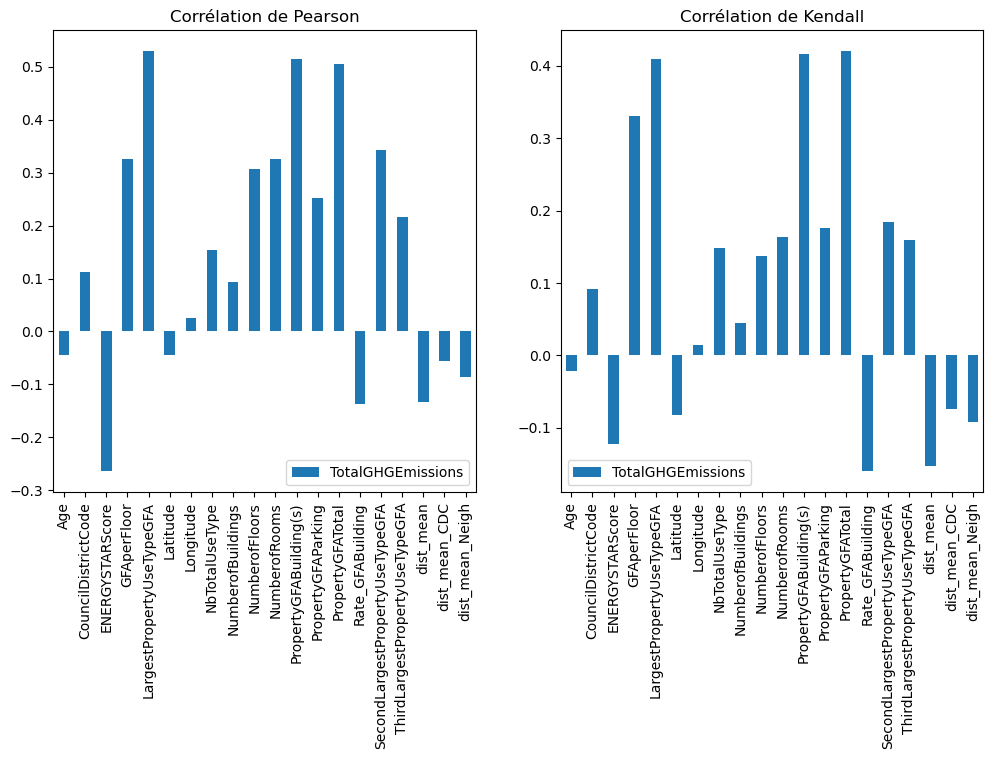

In [41]:
plt.figure(figsize=(12,6))
ax1 = plt.subplot(1, 2, 1)
df.corr()[['TotalGHGEmissions']].sort_index()\
.drop(['TotalGHGEmissions']).plot(kind='bar',ax = ax1)
ax1.set_title("Corrélation de Pearson")


ax2 = plt.subplot(1, 2, 2)
df.corr(method = 'kendall')[['TotalGHGEmissions']].sort_index()\
.drop(['TotalGHGEmissions']).plot(kind='bar',ax = ax2)
ax2.set_title("Corrélation de Kendall");

##### <font color='teal'>3.7.1 Scaling All DataSet Encoding cat Data and Numeric Data</font>

In [42]:
from sklearn.preprocessing import RobustScaler # StandardScaler, MinMaxScaler,Normalizer
Scaler_encod = RobustScaler().fit(X_train_encod)
X_train_encod_scaled = Scaler_encod.transform(X_train_encod)
X_test_encod_scaled = Scaler_encod.transform(X_test_encod)

##### <font color='teal'>3.7.1 Scaling All DataSet WHITOUT ENERGYSTARScore </font>

In [43]:
from sklearn.preprocessing import StandardScaler # MinMaxScaler,Normalizer
Scaler_encodWESS = StandardScaler().fit(X_train_encod.drop(columns=['ENERGYSTARScore']))
X_train_encod_scaledWESS = Scaler_encodWESS.transform( X_train_encod.drop(columns=['ENERGYSTARScore']) )
X_test_encod_scaledWESS = Scaler_encodWESS.transform( X_test_encod.drop(columns=['ENERGYSTARScore']) )

##### <font color='teal'>3.7.3 Scaling Reduct DataSet</font>

##### <font color='teal'>Feature Selection</font>

<font color='green'> RFE : Élimination récursive des fonctionnalités </font>

#### <div class="alert alert-info"><font color='teal'> Liste des colonnes conservées</font></div>

<hr>

</br>

# <a name="C4"><font color='green'>**Partie 4 : Modélisation**</font></a> 

### <a name="C41"><font color='green'>4.1 Dummy Estimator</font></a> 

In [44]:
%%time
warnings.filterwarnings(action='ignore')

#y numerique
naifMean = dummy.DummyRegressor(strategy='mean')
naifMedian = dummy.DummyRegressor(strategy='median')

meanNaifCV = cross_val_score(naifMean,X_train_encod_scaled,np.log1p(y_train),scoring="neg_mean_squared_error")
medianNaifCV = cross_val_score(naifMedian,X_train_encod_scaled,np.log1p(y_train),scoring="neg_mean_squared_error")
meanNaifCVr2 = cross_val_score(naifMean,X_train_encod_scaled,np.log1p(y_train),scoring="r2")

print( "Le score neg_mean_squared_error du DummyRegressor strategy 'mean' est {}".format(meanNaifCV.mean()))
print( "Le score neg_mean_squared_error du DummyRegressor strategy 'median' est {}".format( medianNaifCV.mean() ))

print( "Le score r2 du mean DummyRegressor est {} et le std est {}".format(np.mean(meanNaifCVr2),np.std(meanNaifCVr2)))


Le score neg_mean_squared_error du DummyRegressor strategy 'mean' est -1.9384033825824087
Le score neg_mean_squared_error du DummyRegressor strategy 'median' est -1.940848002639963
Le score r2 du mean DummyRegressor est -0.0026554833549848667 et le std est 0.0037545467983800583
CPU times: total: 31.2 ms
Wall time: 39.4 ms


### <a name="C42"><font color='green'>4.2 Model type Reducted </font></a> 

In [45]:
def compute_score(reg, X, y):
    xval = cross_val_score(reg, X, y, cv = 5,scoring='r2')
    return np.mean(xval)

In [46]:
import time
def compute_score_time(reg, X, y):
    # get starting time
    start = time.time()
    # compute r2 score
    xval = cross_val_score(reg, X, y, cv = 5,scoring='r2')
    # get the execution time
    elapsed_time_lc=(time.time()-start)
    return {'R2 score':round(np.mean(xval),5),'Time':elapsed_time_lc}

In [47]:
import time
from sklearn.model_selection import cross_validate
def compute_cross_validate_score_time(reg, X, y):
    # get starting time
    start = time.time()
    # compute r2 score
    xval = cross_validate(reg, X, y, cv = 5,scoring=['r2','neg_mean_squared_error'])
    # get the execution time
    elapsed_time_lc=(time.time()-start)
    return {'Time':elapsed_time_lc,
            'R2 mean score':round(np.mean(xval['test_r2']),5),
            'R2 std score':round(np.std(xval['test_r2']),5),
            'RMSE mean score':-round(np.mean(xval['test_neg_mean_squared_error']),5),
            'RMSE std score':round(np.std(xval['test_neg_mean_squared_error']),5),
           }

In [48]:
model_type_reducted = dict()

# y => np.log1p
model_type_reducted['LinearRegression'] = compute_cross_validate_score_time(LinearRegression(), X_train_encod_scaled,np.log1p(y_train))
model_type_reducted['RandomForest'] = compute_cross_validate_score_time(RandomForestRegressor(), X_train_encod_scaled,np.log1p(y_train))
model_type_reducted['Ridge'] = compute_cross_validate_score_time(Ridge(), X_train_encod_scaled,np.log1p(y_train))
model_type_reducted['Lasso'] = compute_cross_validate_score_time(Lasso(), X_train_encod_scaled,np.log1p(y_train))
model_type_reducted['ElasticNet'] = compute_cross_validate_score_time(ElasticNet(), X_train_encod_scaled,np.log1p(y_train))
model_type_reducted['Bagging'] = compute_cross_validate_score_time(BaggingRegressor(), X_train_encod_scaled,np.log1p(y_train))
model_type_reducted['AdaBoost'] = compute_cross_validate_score_time(AdaBoostRegressor(), X_train_encod_scaled,np.log1p(y_train))
model_type_reducted['HistGradientBoosting'] = compute_cross_validate_score_time(HistGradientBoostingRegressor(), X_train_encod_scaled,np.log1p(y_train))
model_type_reducted['GradientBoosting'] = compute_cross_validate_score_time(GradientBoostingRegressor(), X_train_encod_scaled,np.log1p(y_train))
model_type_reducted['LightGBM'] = compute_cross_validate_score_time(LGBMRegressor(), X_train_encod_scaled,np.log1p(y_train))
model_type_reducted['xgboost'] = compute_cross_validate_score_time(xgb.XGBRegressor(), X_train_encod_scaled,np.log1p(y_train))
model_type_reducted['svr_linear'] = compute_cross_validate_score_time(LinearSVR(), X_train_encod_scaled,np.log1p(y_train))
model_type_reducted['svr_sigmoid'] = compute_cross_validate_score_time(SVR(kernel='sigmoid'), X_train_encod_scaled,np.log1p(y_train))
model_type_reducted['svr_rbf'] = compute_cross_validate_score_time(SVR(kernel='rbf'), X_train_encod_scaled,np.log1p(y_train))

#y brute sans tranformation
model_type_reducted['svr_poly'] = compute_cross_validate_score_time(SVR(kernel='poly'), X_train_encod_scaled,np.log1p(y_train))
model_type_reducted['kernel_ridge'] = compute_cross_validate_score_time(kernel_ridge.KernelRidge(), X_train_encod_scaled,np.log1p(y_train))

In [49]:
pd.DataFrame(model_type_reducted).T

,Time,R2 mean score,R2 std score,RMSE mean score,RMSE std score
LinearRegression,0.106450,-590.98923,1183.15328,1132.96272,2264.32858
RandomForest,11.995111,0.67924,0.00377,0.62011,0.02495
Ridge,0.051051,0.60554,0.01662,0.76178,0.02519
Lasso,0.043175,0.09515,0.01463,1.74855,0.05120
ElasticNet,0.026230,0.20563,0.02103,1.53453,0.03868
Bagging,1.327631,0.64201,0.00691,0.69172,0.01952
AdaBoost,2.667270,0.53793,0.01320,0.89286,0.03240
HistGradientBoosting,10.111127,0.68742,0.01048,0.60404,0.02560
GradientBoosting,5.052930,0.69088,0.00681,0.59761,0.02635
LightGBM,0.658324,0.68767,0.00939,0.60395,0.03201


In [50]:
# VotingRegressor
VotingRegressor_er = VotingRegressor([('gb', GradientBoostingRegressor()), 
                                      ('rf', RandomForestRegressor()), 
                                      ('LightGbm', LGBMRegressor()), 
                                      ('HistGBoost',HistGradientBoostingRegressor()), 
                                      ('xgb',xgb.XGBRFRegressor()),
                                      ('Ridge',Ridge())]
                                    )

model_type_reducted['VotingRegressor'] = compute_cross_validate_score_time(VotingRegressor_er, X_train_encod_scaled,np.log1p(y_train))



# StackingRegressor
from sklearn.ensemble import StackingRegressor
estimators = [('gb', GradientBoostingRegressor()), 
              ('rf', RandomForestRegressor()), 
              ('LightGbm', LGBMRegressor()),
              ('HistGBoost',HistGradientBoostingRegressor()),
              ('xgb',xgb.XGBRFRegressor()),
              ('Ridge',Ridge())
             ]
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=1000,max_depth=5,random_state=42)
)

model_type_reducted['StackingRegressor'] = compute_cross_validate_score_time(reg, X_train_encod_scaled,np.log1p(y_train))

In [51]:
pd.DataFrame(model_type_reducted).T.sort_values(by = ['R2 mean score'] , ascending = False)

,Time,R2 mean score,R2 std score,RMSE mean score,RMSE std score
VotingRegressor,29.992536,0.70325,0.00596,0.57358,0.02218
StackingRegressor,169.099051,0.69969,0.01249,0.58005,0.02161
GradientBoosting,5.052930,0.69088,0.00681,0.59761,0.02635
LightGBM,0.658324,0.68767,0.00939,0.60395,0.03201
HistGradientBoosting,10.111127,0.68742,0.01048,0.60404,0.02560
xgboost,1.918416,0.68025,0.01552,0.61791,0.03441
RandomForest,11.995111,0.67924,0.00377,0.62011,0.02495
Bagging,1.327631,0.64201,0.00691,0.69172,0.01952
Ridge,0.051051,0.60554,0.01662,0.76178,0.02519
kernel_ridge,0.407899,0.59605,0.01579,0.78027,0.02830


### <a name="C43"><font color='green'>4.3 Model type Whitout ENERGYSTARScore </font></a> 

In [52]:
model_type_WESS = dict()

# y => np.log1p
model_type_WESS['LinearRegression'] = compute_cross_validate_score_time(LinearRegression(), X_train_encod_scaledWESS,np.log1p(y_train))
model_type_WESS['RandomForest'] = compute_cross_validate_score_time(RandomForestRegressor(), X_train_encod_scaledWESS,np.log1p(y_train))
model_type_WESS['Ridge'] = compute_cross_validate_score_time(Ridge(), X_train_encod_scaledWESS,np.log1p(y_train))
model_type_WESS['Lasso'] = compute_cross_validate_score_time(Lasso(), X_train_encod_scaledWESS,np.log1p(y_train))
model_type_WESS['ElasticNet'] = compute_cross_validate_score_time(ElasticNet(), X_train_encod_scaledWESS,np.log1p(y_train))
model_type_WESS['Bagging'] = compute_cross_validate_score_time(BaggingRegressor(), X_train_encod_scaledWESS,np.log1p(y_train))
model_type_WESS['AdaBoost'] = compute_cross_validate_score_time(AdaBoostRegressor(), X_train_encod_scaledWESS,np.log1p(y_train))
model_type_WESS['HistGradientBoosting'] = compute_cross_validate_score_time(HistGradientBoostingRegressor(), X_train_encod_scaledWESS,np.log1p(y_train))
model_type_WESS['GradientBoosting'] = compute_cross_validate_score_time(GradientBoostingRegressor(), X_train_encod_scaledWESS,np.log1p(y_train))
model_type_WESS['LightGBM'] = compute_cross_validate_score_time(LGBMRegressor(), X_train_encod_scaledWESS,np.log1p(y_train))
model_type_WESS['xgboost'] = compute_cross_validate_score_time(xgb.XGBRegressor(), X_train_encod_scaledWESS,np.log1p(y_train))
model_type_WESS['svr_linear'] = compute_cross_validate_score_time(LinearSVR(), X_train_encod_scaledWESS,np.log1p(y_train))
model_type_WESS['svr_rbf'] = compute_cross_validate_score_time(SVR(kernel='rbf'), X_train_encod_scaledWESS,np.log1p(y_train))

#y brute sans tranformation
model_type_WESS['svr_poly'] = compute_cross_validate_score_time(SVR(kernel='poly'), X_train_encod_scaledWESS,y_train)
model_type_WESS['kernel_ridge'] = compute_cross_validate_score_time(kernel_ridge.KernelRidge(), X_train_encod_scaledWESS,y_train)
model_type_WESS['svr_sigmoid'] = compute_cross_validate_score_time(SVR(kernel='sigmoid'), X_train_encod_scaledWESS,y_train)

In [54]:
# VotingRegressor
VotingRegressor_er = VotingRegressor([('gb', GradientBoostingRegressor()), 
                                      ('rf', RandomForestRegressor()), 
                                      ('LightGbm', LGBMRegressor()), 
                                      ('AdaBoost', AdaBoostRegressor()),
                                      ('HistGBoost',HistGradientBoostingRegressor()), 
                                      ('xgb',xgb.XGBRFRegressor()),
                                      ('Ridge',Ridge())]
                                    )

model_type_WESS['VotingRegressor'] = compute_cross_validate_score_time(VotingRegressor_er, X_train_encod_scaledWESS,np.log1p(y_train))



# StackingRegressor
from sklearn.ensemble import StackingRegressor
estimators = [('gb', GradientBoostingRegressor()), 
              ('rf', RandomForestRegressor()), 
              ('LightGbm', LGBMRegressor()), 
              ('AdaBoost', AdaBoostRegressor()),
              ('HistGBoost',HistGradientBoostingRegressor()), 
              ('xgb',xgb.XGBRFRegressor()),
              ('Ridge',Ridge())]
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=1000,max_depth=5,random_state=42)
)

model_type_WESS['StackingRegressor'] = compute_cross_validate_score_time(reg, X_train_encod_scaledWESS,np.log1p(y_train))

In [60]:
pd.DataFrame(model_type_WESS).T.sort_values(by = ['R2 mean score'] , ascending = False)

,Time,R2 mean score,R2 std score,RMSE mean score,RMSE std score
VotingRegressor,31.699499,6.305800e-01,1.174000e-02,7.137200e-01,2.476000e-02
StackingRegressor,182.343332,6.283400e-01,1.282000e-02,7.181000e-01,2.804000e-02
GradientBoosting,4.921521,6.242600e-01,1.213000e-02,7.262600e-01,3.336000e-02
RandomForest,11.761006,6.190700e-01,1.748000e-02,7.359100e-01,3.479000e-02
HistGradientBoosting,9.394636,6.013900e-01,1.582000e-02,7.702800e-01,3.621000e-02
LightGBM,0.749791,5.970300e-01,1.743000e-02,7.784900e-01,3.406000e-02
xgboost,1.827695,5.893300e-01,1.116000e-02,7.934700e-01,2.630000e-02
Bagging,1.297056,5.823600e-01,1.537000e-02,8.067300e-01,2.793000e-02
Ridge,0.031244,5.554200e-01,1.451000e-02,8.585100e-01,1.427000e-02
svr_rbf,1.656251,5.546500e-01,1.148000e-02,8.604200e-01,2.524000e-02


In [56]:
'ENERGYSTARScore' in Scaler_encod.feature_names_in_

True

In [57]:
'ENERGYSTARScore' in Scaler_encodWESS.feature_names_in_

False

In [58]:
'SiteEnergyUseWN(kBtu)' in Scaler_encodWESS.feature_names_in_

False

In [59]:
'TotalGHGEmissions' in Scaler_encodWESS.feature_names_in_

False

### <a name="C45"><font color='green'>4.5 Benchmark</font></a> 

In [63]:
# Init inner and outer loop
inner_cv = KFold(n_splits=3,shuffle=True,random_state=0)
outer_cv = KFold(n_splits=3,shuffle=True,random_state=1)

In [64]:
from sklearn.model_selection import cross_validate

def do_cross_validation_upgrade(clf,X,y, print_model=False):
    cv = cross_validate(clf, X, y, scoring=('r2', 'neg_mean_squared_error'), cv=outer_cv)
    
    scores_neg_mean_squared_error = ' + '.join(f'{s:.2f}' for s in cv["test_neg_mean_squared_error"])
    scores_r2 = ' + '.join(f'{s:.2f}' for s in cv["test_r2"])
    
    mean_r2 = cv["test_r2"].mean()
    mean_nRMSE = cv["test_neg_mean_squared_error"].mean()
    
    msg_r2 = f'Cross-validated r2: ({scores_r2}) / 3 = {mean_r2:.4f}'
    msg_nRMSE = f'Cross-validated rmse: ({scores_neg_mean_squared_error}) / 3 = {mean_nRMSE:.4f}'
    
    if print_model:
        msg_nRMSE = f'{clf}:\n\t{msg_nRMSE}\n'
        msg_r2 = f'{clf}:\n\t{msg_r2}\n'
    
    print(msg_nRMSE)
    print('\n')
    print(msg_r2)
    
def do_cross_validation(clf,X,y, print_model=False):
    cv = cross_validate(clf, X, y, scoring=('r2', 'neg_mean_squared_error'), cv=outer_cv)
    scores = ' + '.join(f'{s:.2f}' for s in cv["test_score"])
    mean_ = cv["test_score"].mean()
    msg = f'Cross-validated rmse: ({scores}) / 3 = {mean_:.4f}'
    
    if print_model:
        msg = f'{clf}:\n\t{msg}\n'
    
    print(msg)

<font color='red'> 4.3.Data non Residentiel</font>

In [148]:
# Index non Residentiel
IdxTrainNonRes = ['Multifamily' not in x for x in X_train.BuildingType]
IdxTestNonRes = ['Multifamily' not in x for x in X_test.BuildingType]

# X data non residentiel
X_train_encod_scaledNonRes = X_train_encod_scaled[IdxTrainNonRes]
X_test_encod_scaledNonRes = X_test_encod_scaled[IdxTestNonRes]

# Y data non residentiel
y_trainNonRes = y_train[IdxTrainNonRes]
y_testNonRes = y_test[IdxTestNonRes]

In [147]:
# Avons nous tous batiments non résidentiels
X_train_encod_scaledNonRes[:,0].size + X_test_encod_scaledNonRes[:,0].size == X.loc[['Multifamily' not in x for x in X.BuildingType]].shape[0]

True

<font color='red'> 4.3.1. RandomForestRegressor</font>

In [105]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

<font color='red'>4.3.7. Gradient Boosting Regressor </font>

In [65]:
%%time
from sklearn.ensemble import GradientBoostingRegressor

params_grid_gb = {'n_estimators': [5,100,200, 500],
                  'loss' : ['squared_error', 'absolute_error', 'huber'],
                  'learning_rate' : [0.1,0.2,0.5,1],
                 }

###### Gradient Boosting Regressor inner loop
gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=0), 
                       param_grid = params_grid_gb,
                       cv=inner_cv, 
                       n_jobs=4,
                       scoring='neg_root_mean_squared_error')

# Gradient Boosting Regressor outer loop
do_cross_validation_upgrade(gb_grid,X_train_encod_scaledWESS, np.log1p(y_train), print_model=True)
print('_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_')
print('Resultat log1p(y):')
do_cross_validation_upgrade(gb_grid,X_train_encod_scaled, np.log1p(y_train), print_model=True)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=GradientBoostingRegressor(random_state=0), n_jobs=4,
             param_grid={'learning_rate': [0.1, 0.2, 0.5, 1],
                         'loss': ['squared_error', 'absolute_error', 'huber'],
                         'n_estimators': [5, 100, 200, 500]},
             scoring='neg_root_mean_squared_error'):
	Cross-validated rmse: (-0.71 + -0.73 + -0.76) / 3 = -0.7346



GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=GradientBoostingRegressor(random_state=0), n_jobs=4,
             param_grid={'learning_rate': [0.1, 0.2, 0.5, 1],
                         'loss': ['squared_error', 'absolute_error', 'huber'],
                         'n_estimators': [5, 100, 200, 500]},
             scoring='neg_root_mean_squared_error'):
	Cross-validated r2: (0.63 + 0.62 + 0.61) / 3 = 0.6204

_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-

In [1]:
#r2
(0.6864 - 0.6204)/0.6204

0.10638297872340435

In [2]:
#RMSE
(0.6071 - 0.7346)/0.7346

-0.17356384426899

In [90]:
%time
res = gb_grid.fit(X_train_encod_scaled, np.log1p(y_train))
# Print the model parameters of the best model
print(res.best_params_)

CPU times: total: 0 ns
Wall time: 0 ns
{'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 200}


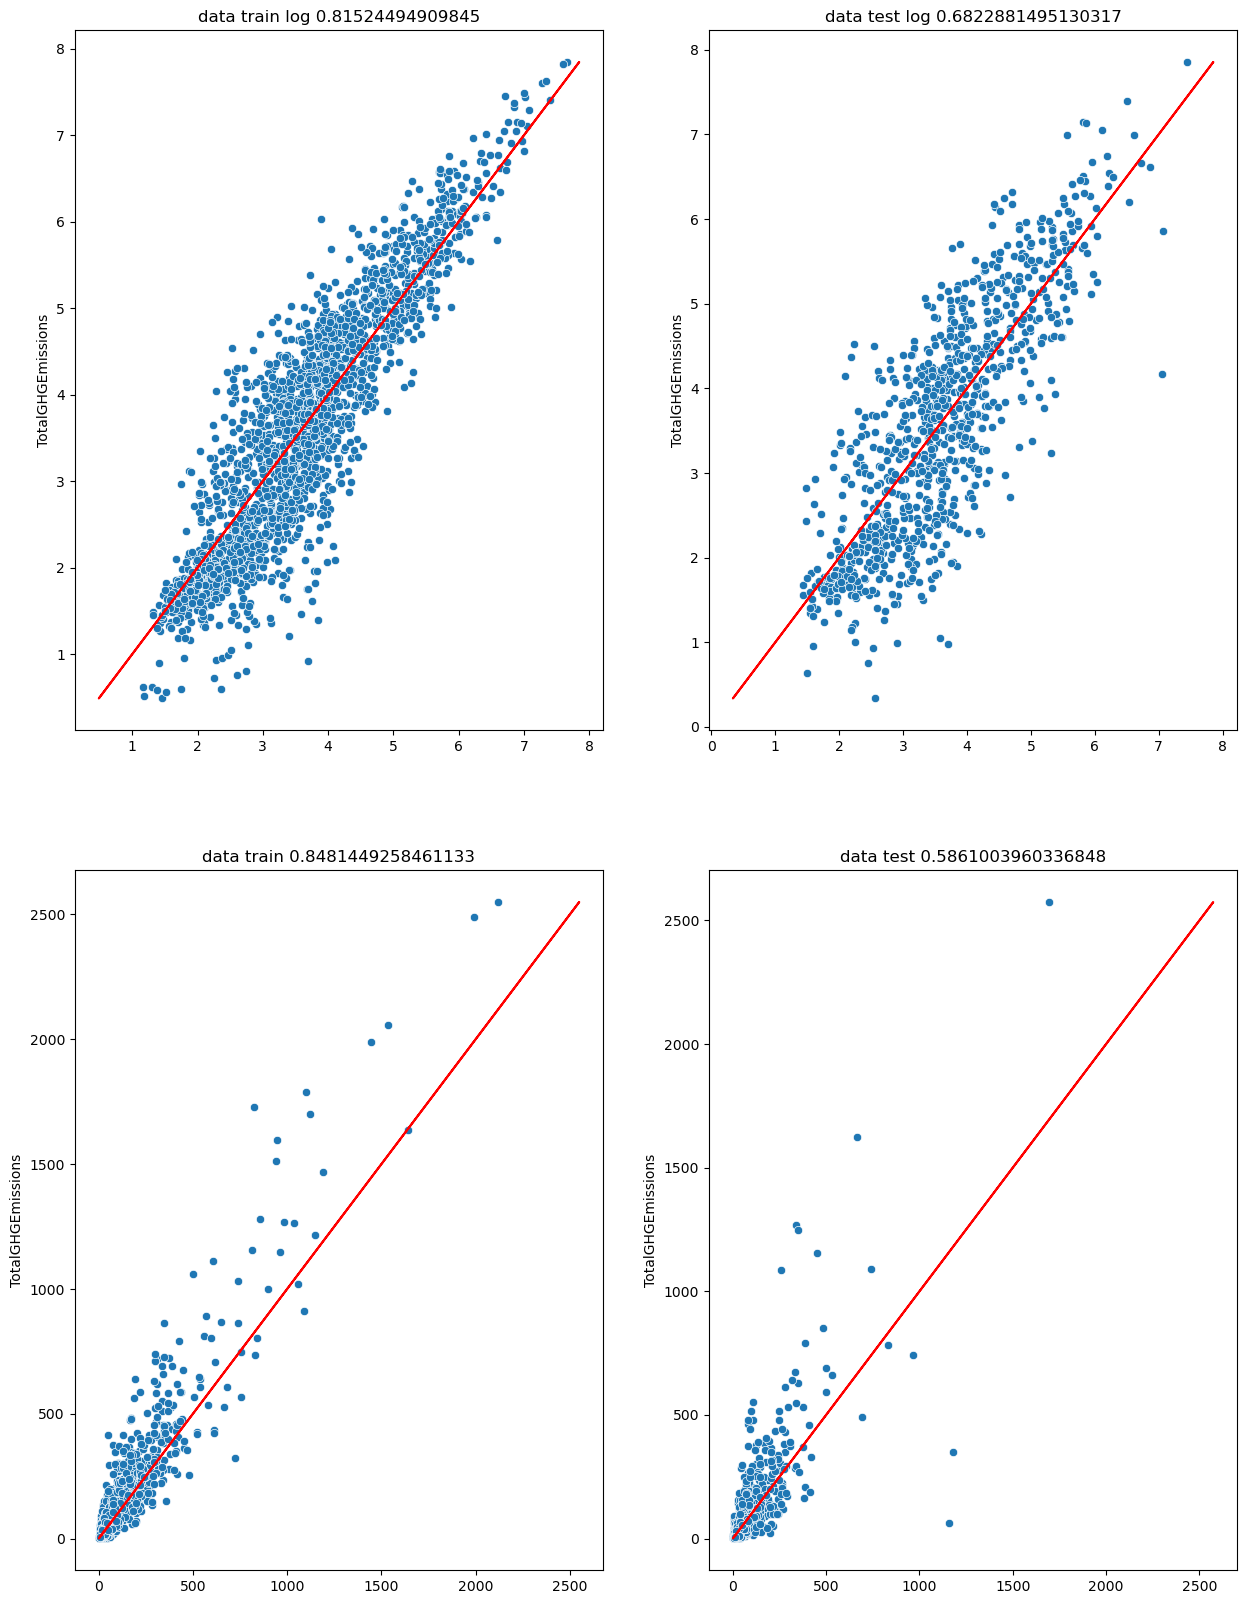

In [154]:
# Entrainement du modele
#best_modelGB = GradientBoostingRegressor(**res.best_params_).fit(X_train_encod_scaled, np.log1p(y_train))

# predict with best param
from sklearn.metrics import r2_score
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,20))
#xes = axes.flatten()

sns.scatterplot(x= res.best_estimator_.predict(X_train_encod_scaled), y = np.log1p(y_train),ax=axes[0,0])
axes[0,0].set_title('data train log ' + str(r2_score(np.log1p(y_train),res.best_estimator_.predict(X_train_encod_scaled))) )
axes[0,0].plot(np.log1p(y_train),np.log1p(y_train),'r')

sns.scatterplot(x= res.best_estimator_.predict(X_test_encod_scaled), y = np.log1p(y_test),ax=axes[0,1])
axes[0,1].set_title('data test log ' + str(r2_score(np.log1p(y_test),res.best_estimator_.predict(X_test_encod_scaled))) )
axes[0,1].plot(np.log1p(y_test),np.log1p(y_test),'r')

# transformation inverse
sns.scatterplot(x= np.expm1(res.best_estimator_.predict(X_train_encod_scaled)), y = y_train,ax=axes[1,0])
axes[1,0].set_title('data train ' + str(r2_score(y_train,np.expm1(res.best_estimator_.predict(X_train_encod_scaled))) ))
axes[1,0].plot(y_train,y_train,'r')

sns.scatterplot(x= np.expm1(res.best_estimator_.predict(X_test_encod_scaled)), y = y_test,ax=axes[1,1])
axes[1,1].set_title('data test ' + str(r2_score(y_test,np.expm1(res.best_estimator_.predict(X_test_encod_scaled))) ) )
axes[1,1].plot(y_test,y_test,'r');

In [92]:
from sklearn.metrics import mean_squared_error,r2_score

score_er = dict()
score_er['rmse log + train']= mean_squared_error( np.log1p(y_train), res.best_estimator_.predict(X_train_encod_scaled), squared=True )
score_er['rmse log + test']= mean_squared_error( np.log1p(y_test), res.best_estimator_.predict(X_test_encod_scaled), squared=True )

score_er['rmse train']= mean_squared_error( y_train, np.expm1(res.best_estimator_.predict(X_train_encod_scaled)), squared=True )
score_er['rmse test']= mean_squared_error(y_test, np.expm1(res.best_estimator_.predict(X_test_encod_scaled)), squared=True) 

score_er['r2 log + train']= r2_score(np.log1p(y_train), res.best_estimator_.predict(X_train_encod_scaled) )
score_er['r2 log + test']= r2_score( np.log1p(y_test), res.best_estimator_.predict(X_test_encod_scaled)  )

score_er['r2 train']= r2_score( y_train, np.expm1(res.best_estimator_.predict(X_train_encod_scaled)) )
score_er['r2 test']= r2_score( y_test, np.expm1(res.best_estimator_.predict(X_test_encod_scaled))) 

pd.DataFrame(score_er,index=['RMSE'])

,rmse log + train,rmse log + test,rmse train,rmse test,r2 log + train,r2 log + test,r2 train,r2 test
RMSE,0.357778,0.596161,5796.270477,12263.82492,0.815245,0.682288,0.848145,0.5861


Elapsed time to compute the importances: 0.004 seconds


<AxesSubplot:xlabel='Colonnes'>

<Figure size 1200x1200 with 0 Axes>

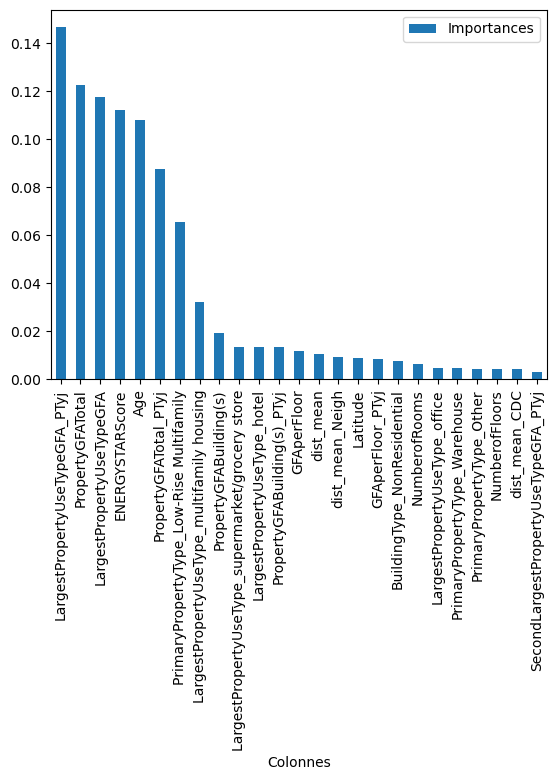

In [69]:
###################  Feature Importance  ###################
# cf https://mljar.com/blog/feature-importance-in-random-forest/
import time
import numpy as np

start_time = time.time()
importances = res.best_estimator_.feature_importances_
#std = np.std([tree.feature_importances_ for tree in res.best_estimator_.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

X_data = pd.DataFrame({'Colonnes' : Scaler_encod.feature_names_in_, 
                       'Importances' : res.best_estimator_.feature_importances_})

plt.figure(figsize = (12,12))

X_data.sort_values(by = 'Importances',ascending=False) .head(25).plot(kind = 'bar',x = 'Colonnes' )
#plt.barh(Scaler_encod.feature_names_in_, res.best_estimator_.feature_importances_);

In [73]:
result = pd.DataFrame(res.best_estimator_.feature_importances_,index=Scaler_encod.feature_names_in_,
             columns=['Importance'])\
.sort_values(by ='Importance', ascending=False).reset_index()

result.rename({'index': 'Colonnes'}, axis='columns',inplace=True)
result

,Colonnes,Importance
0,LargestPropertyUseTypeGFA_PTyj,1.466553e-01
1,PropertyGFATotal,1.227739e-01
2,LargestPropertyUseTypeGFA,1.175829e-01
3,ENERGYSTARScore,1.120914e-01
4,Age,1.079349e-01
5,PropertyGFATotal_PTyj,8.758883e-02
6,PrimaryPropertyType_Low-Rise Multifamily,6.563659e-02
7,LargestPropertyUseType_multifamily housing,3.215093e-02
8,PropertyGFABuilding(s),1.949949e-02
9,LargestPropertyUseType_supermarket/grocery store,1.362465e-02


<font color='red'>4.3.7.2 LightGBM </font>

In [93]:
%%time
from sklearn.linear_model import LinearRegression

# p = X_train.shape[1]#nombre de variable

###### random forest inner loop
LightGbm_grid = GridSearchCV(LGBMRegressor(n_jobs= -2), 
                       param_grid={'learning_rate':[0.07552619413921881,0.1,],  
                                    'colsample_bytree': [0.5,1.0,],
                                    'subsample': [0.6633806094241483,1.0,],
                                    'reg_alpha': [0.0,0.05,], 
                                    'reg_lambda': [0,0.05],
                                    'num_leaves':[26,31,36,] ,  
                                    #'n_estimators':[100,1000]
                                  },
                       cv=inner_cv,n_jobs= 1,scoring='neg_root_mean_squared_error'
                      )
# random forest outer loop
print('Resultat y SANS NRJSTARScore:')
do_cross_validation_upgrade(LightGbm_grid,X_train_encod_scaledWESS, np.log1p(y_train), print_model=False)
print('_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_')
print('Resultat AVEC NRJSTARScore log1p(y):')
do_cross_validation_upgrade(LightGbm_grid,X_train_encod_scaled, np.log1p(y_train), print_model=False)

Resultat y SANS NRJSTARScore:
Cross-validated rmse: (-0.76 + -0.76 + -0.79) / 3 = -0.7717


Cross-validated r2: (0.60 + 0.61 + 0.60) / 3 = 0.6012
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
Resultat AVEC NRJSTARScore log1p(y):
Cross-validated rmse: (-0.62 + -0.62 + -0.65) / 3 = -0.6311


Cross-validated r2: (0.67 + 0.68 + 0.67) / 3 = 0.6739
CPU times: total: 25min 54s
Wall time: 3min 34s


In [94]:
resLGbm = LightGbm_grid.fit(X_train_encod_scaled, np.log1p(y_train))
# Print the model parameters of the best model
print(resLGbm.best_params_)

{'colsample_bytree': 0.5, 'learning_rate': 0.07552619413921881, 'num_leaves': 26, 'reg_alpha': 0.05, 'reg_lambda': 0.05, 'subsample': 0.6633806094241483}


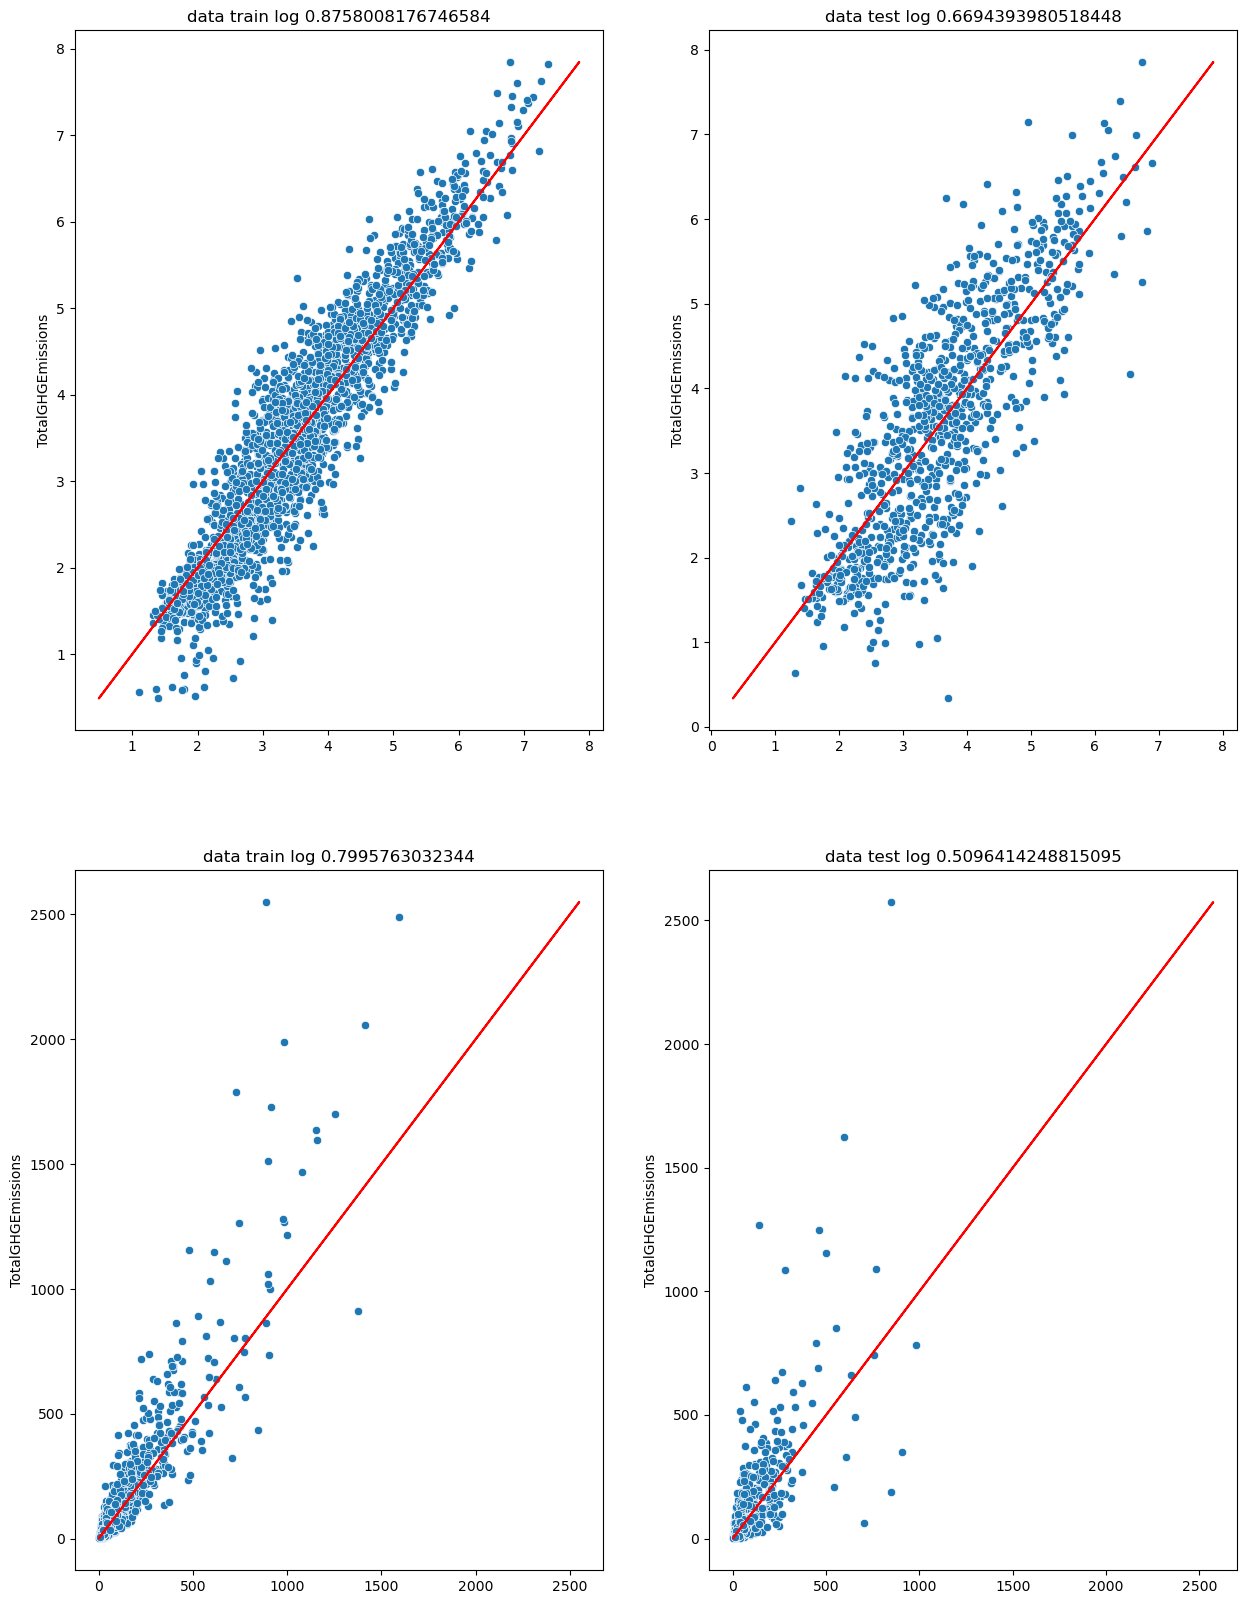

In [95]:
# Entrainement du modele LightGbm

# predict with best param
from sklearn.metrics import r2_score
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,20))
#xes = axes.flatten()

sns.scatterplot(x= resLGbm.best_estimator_.predict(X_train_encod_scaled), y = np.log1p(y_train),ax=axes[0,0])
axes[0,0].set_title('data train log ' + str(r2_score(np.log1p(y_train),resLGbm.best_estimator_.predict(X_train_encod_scaled))) )
axes[0,0].plot(np.log1p(y_train),np.log1p(y_train),'r')

sns.scatterplot(x= resLGbm.best_estimator_.predict(X_test_encod_scaled), y = np.log1p(y_test),ax=axes[0,1])
axes[0,1].set_title('data test log ' + str(r2_score(np.log1p(y_test),resLGbm.best_estimator_.predict(X_test_encod_scaled))) )
axes[0,1].plot(np.log1p(y_test),np.log1p(y_test),'r')

# transformation inverse
sns.scatterplot(x= np.expm1(resLGbm.best_estimator_.predict(X_train_encod_scaled)), y = y_train,ax=axes[1,0])
axes[1,0].set_title('data train log ' + str(r2_score(y_train,np.expm1(resLGbm.best_estimator_.predict(X_train_encod_scaled))) ))
axes[1,0].plot(y_train,y_train,'r')

sns.scatterplot(x= np.expm1(resLGbm.best_estimator_.predict(X_test_encod_scaled)), y = y_test,ax=axes[1,1])
axes[1,1].set_title('data test log ' + str(r2_score(y_test,np.expm1(resLGbm.best_estimator_.predict(X_test_encod_scaled))) ) )
axes[1,1].plot(y_test,y_test,'r');

In [96]:
from sklearn.metrics import mean_squared_error,r2_score

score_er = dict()
score_er['rmse log + train']= mean_squared_error( np.log1p(y_train),resLGbm.best_estimator_.predict(X_train_encod_scaled), squared=True )
score_er['rmse log + test']= mean_squared_error( np.log1p(y_test),resLGbm.best_estimator_.predict(X_test_encod_scaled), squared=True )

score_er['rmse train']= mean_squared_error( y_train,np.expm1(resLGbm.best_estimator_.predict(X_train_encod_scaled)), squared=True )
score_er['rmse test']= mean_squared_error(  y_test,np.expm1(resLGbm.best_estimator_.predict(X_test_encod_scaled)),squared=True) 

score_er['r2 log + train']= r2_score( np.log1p(y_train), resLGbm.best_estimator_.predict(X_train_encod_scaled) )
score_er['r2 log + test']= r2_score( np.log1p(y_test), resLGbm.best_estimator_.predict(X_test_encod_scaled) )

score_er['r2 train']= r2_score(y_train, np.expm1(resLGbm.best_estimator_.predict(X_train_encod_scaled)) )
score_er['r2 test']= r2_score(y_test, np.expm1(resLGbm.best_estimator_.predict(X_test_encod_scaled)) ) 

pd.DataFrame(score_er,index=['RMSE'])

,rmse log + train,rmse log + test,rmse train,rmse test,r2 log + train,r2 log + test,r2 train,r2 test
RMSE,0.240512,0.620271,7650.122744,14529.300477,0.875801,0.669439,0.799576,0.509641


<font color='red'>4.3.8.3 Stacking </font>

In [103]:
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=1000,max_depth=5,random_state=42)
)

In [104]:
# VotingRegressor
StackingRegressor_er = StackingRegressor([('gb', GradientBoostingRegressor(**res.best_params_)), 
                                      ('rf', RandomForestRegressor()), 
                                      ('LightGbm', LGBMRegressor(**resLGbm.best_params_)), 
                                      ('HistGBoost',HistGradientBoostingRegressor()), 
                                      ('xgb',xgb.XGBRFRegressor()),
                                      ],
    final_estimator=RandomForestRegressor(n_estimators=500,max_depth=5,random_state=42)
                                    )

StackingRegressor_er.fit(X_train_encod_scaled, np.log1p(y_train))

StackingRegressor(estimators=[('gb',
                               GradientBoostingRegressor(loss='huber',
                                                         n_estimators=200)),
                              ('rf', RandomForestRegressor()),
                              ('LightGbm',
                               LGBMRegressor(colsample_bytree=0.5,
                                             learning_rate=0.07552619413921881,
                                             num_leaves=26, reg_alpha=0.05,
                                             reg_lambda=0.05,
                                             subsample=0.6633806094241483)),
                              ('HistGBoost', HistGradientBoostingRegressor()),
                              ('xgb',
                               XGBRFRegressor...
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='reg:squarederror',
                                              predictor=None, random_state=None,
                                              reg_alpha=None,
                                              scale_pos_weight=None,
                                              tree_method=None,
                                              validate_parameters=None,
                                              verbosity=None))],
                  final_estimator=RandomForestRegressor(max_depth=5,
                                                        n_estimators=500,
                                                        random_state=42))

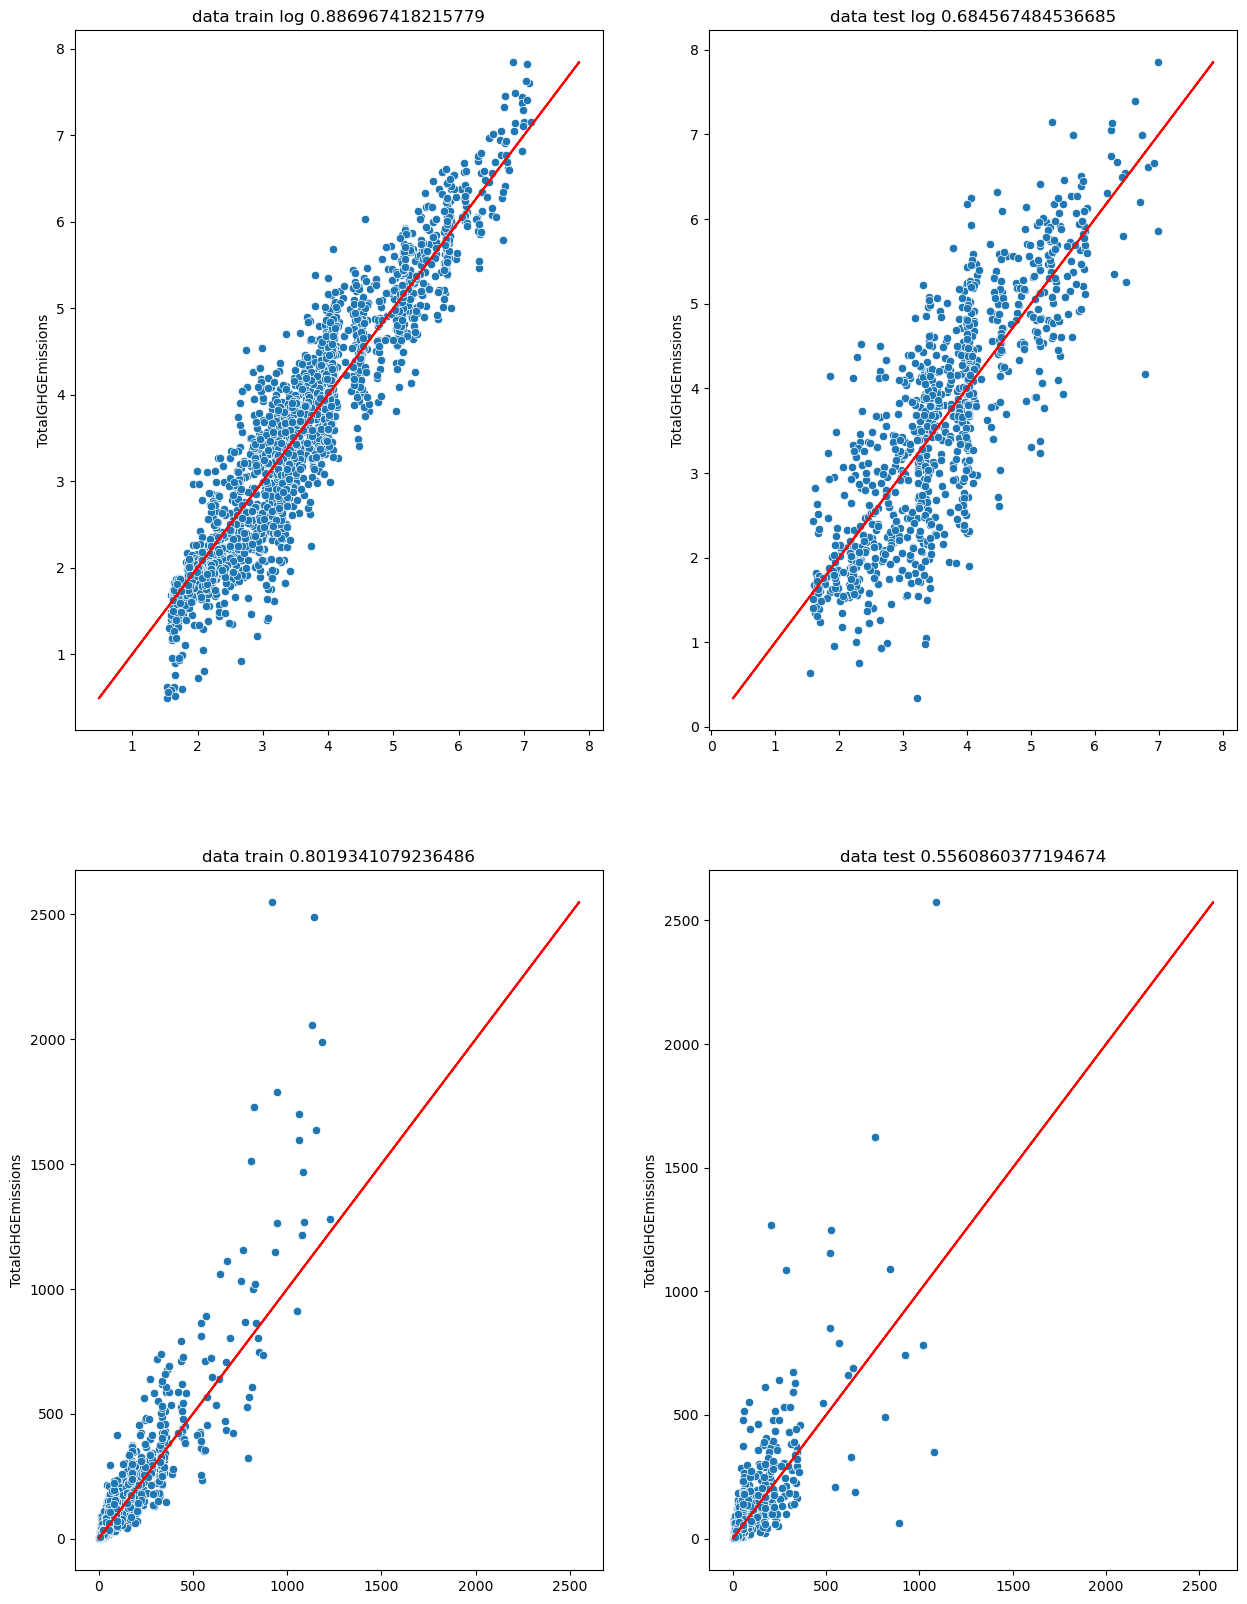

In [105]:
# Entrainement du modele

# predict with best param
from sklearn.metrics import r2_score
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,20))
#xes = axes.flatten()

sns.scatterplot(x= StackingRegressor_er.predict(X_train_encod_scaled), y = np.log1p(y_train),ax=axes[0,0])
axes[0,0].set_title('data train log ' + str(r2_score(np.log1p(y_train),StackingRegressor_er.predict(X_train_encod_scaled))) )
axes[0,0].plot(np.log1p(y_train),np.log1p(y_train),'r')

sns.scatterplot(x=StackingRegressor_er.predict(X_test_encod_scaled), y = np.log1p(y_test),ax=axes[0,1])
axes[0,1].set_title('data test log ' + str(r2_score(np.log1p(y_test),StackingRegressor_er.predict(X_test_encod_scaled))) )
axes[0,1].plot(np.log1p(y_test),np.log1p(y_test),'r')

# transformation inverse
sns.scatterplot(x= np.expm1(StackingRegressor_er.predict(X_train_encod_scaled)), y = y_train,ax=axes[1,0])
axes[1,0].set_title('data train ' + str(r2_score(y_train,np.expm1(StackingRegressor_er.predict(X_train_encod_scaled))) ))
axes[1,0].plot(y_train,y_train,'r')

sns.scatterplot(x= np.expm1(StackingRegressor_er.predict(X_test_encod_scaled)), y = y_test,ax=axes[1,1])
axes[1,1].set_title('data test ' + str(r2_score(y_test,np.expm1(StackingRegressor_er.predict(X_test_encod_scaled))) ) )
axes[1,1].plot(y_test,y_test,'r')

In [108]:
from sklearn.metrics import mean_squared_error,r2_score

score_er = dict()
score_er['rmse log + train']= mean_squared_error( np.log1p(y_train),StackingRegressor_er.predict(X_train_encod_scaled), squared=True )
score_er['rmse log + test']= mean_squared_error( np.log1p(y_test),StackingRegressor_er.predict(X_test_encod_scaled), squared=True )

score_er['rmse train']= mean_squared_error( y_train,np.expm1(StackingRegressor_er.predict(X_train_encod_scaled)), squared=True )
score_er['rmse test']= mean_squared_error(  y_test,np.expm1(StackingRegressor_er.predict(X_test_encod_scaled)),squared=True) 

score_er['r2 log + train']= r2_score( np.log1p(y_train), StackingRegressor_er.predict(X_train_encod_scaled) )
score_er['r2 log + test']= r2_score( np.log1p(y_test), StackingRegressor_er.predict(X_test_encod_scaled) )

score_er['r2 train']= r2_score( y_train, np.expm1(StackingRegressor_er.predict(X_train_encod_scaled))  )
score_er['r2 test']= r2_score( y_test, np.expm1(StackingRegressor_er.predict(X_test_encod_scaled)) ) 

pd.DataFrame(score_er,index=['RMSE'])

,rmse log + train,rmse log + test,rmse train,rmse test,r2 log + train,r2 log + test,r2 train,r2 test
RMSE,0.218888,0.591884,7560.125924,13153.148882,0.886967,0.684567,0.801934,0.556086


### Non residensiel

In [149]:
# Stacking
from sklearn.metrics import mean_squared_error,r2_score

score_er = dict()
score_er['rmse log + train']= mean_squared_error( np.log1p(y_trainNonRes),StackingRegressor_er.predict(X_train_encod_scaledNonRes), squared=True )
score_er['rmse log + test']= mean_squared_error( np.log1p(y_testNonRes),StackingRegressor_er.predict(X_test_encod_scaledNonRes), squared=True )

score_er['rmse train']= mean_squared_error( y_trainNonRes,np.expm1(StackingRegressor_er.predict(X_train_encod_scaledNonRes)), squared=True )
score_er['rmse test']= mean_squared_error(  y_testNonRes,np.expm1(StackingRegressor_er.predict(X_test_encod_scaledNonRes)),squared=True) 

score_er['r2 log + train']= r2_score( np.log1p(y_trainNonRes), StackingRegressor_er.predict(X_train_encod_scaledNonRes) )
score_er['r2 log + test']= r2_score( np.log1p(y_testNonRes), StackingRegressor_er.predict(X_test_encod_scaledNonRes) )

score_er['r2 train']= r2_score( y_trainNonRes, np.expm1(StackingRegressor_er.predict(X_train_encod_scaledNonRes))  )
score_er['r2 test']= r2_score( y_testNonRes, np.expm1(StackingRegressor_er.predict(X_test_encod_scaledNonRes)) ) 

pd.DataFrame(score_er,index=['RMSE'])

,rmse log + train,rmse log + test,rmse train,rmse test,r2 log + train,r2 log + test,r2 train,r2 test
RMSE,0.220817,0.642706,12904.865964,22416.749247,0.882834,0.657178,0.789855,0.551604


In [150]:
# Gradient boost
from sklearn.metrics import mean_squared_error,r2_score

score_er = dict()
score_er['rmse log + train']= mean_squared_error( np.log1p(y_trainNonRes), res.best_estimator_.predict(X_train_encod_scaledNonRes), squared=True )
score_er['rmse log + test']= mean_squared_error( np.log1p(y_testNonRes), res.best_estimator_.predict(X_test_encod_scaledNonRes), squared=True )

score_er['rmse train']= mean_squared_error( y_trainNonRes, np.expm1(res.best_estimator_.predict(X_train_encod_scaledNonRes)), squared=True )
score_er['rmse test']= mean_squared_error(y_testNonRes, np.expm1(res.best_estimator_.predict(X_test_encod_scaledNonRes)), squared=True) 

score_er['r2 log + train']= r2_score(np.log1p(y_trainNonRes), res.best_estimator_.predict(X_train_encod_scaledNonRes) )
score_er['r2 log + test']= r2_score( np.log1p(y_testNonRes), res.best_estimator_.predict(X_test_encod_scaledNonRes)  )

score_er['r2 train']= r2_score( y_trainNonRes, np.expm1(res.best_estimator_.predict(X_train_encod_scaledNonRes)) )
score_er['r2 test']= r2_score( y_testNonRes, np.expm1(res.best_estimator_.predict(X_test_encod_scaledNonRes))) 

pd.DataFrame(score_er,index=['RMSE'])

,rmse log + train,rmse log + test,rmse train,rmse test,r2 log + train,r2 log + test,r2 train,r2 test
RMSE,0.354742,0.646258,10247.318489,19648.326935,0.811773,0.655283,0.833131,0.60698


In [152]:
#LightGbm
from sklearn.metrics import mean_squared_error,r2_score

score_er = dict()
score_er['rmse log + train']= mean_squared_error( np.log1p(y_trainNonRes),resLGbm.best_estimator_.predict(X_train_encod_scaledNonRes), squared=True )
score_er['rmse log + test']= mean_squared_error( np.log1p(y_testNonRes),resLGbm.best_estimator_.predict(X_test_encod_scaledNonRes), squared=True )

score_er['rmse train']= mean_squared_error( y_trainNonRes,np.expm1(resLGbm.best_estimator_.predict(X_train_encod_scaledNonRes)), squared=True )
score_er['rmse test']= mean_squared_error(  y_testNonRes,np.expm1(resLGbm.best_estimator_.predict(X_test_encod_scaledNonRes)),squared=True) 

score_er['r2 log + train']= r2_score( np.log1p(y_trainNonRes), resLGbm.best_estimator_.predict(X_train_encod_scaledNonRes) )
score_er['r2 log + test']= r2_score( np.log1p(y_testNonRes), resLGbm.best_estimator_.predict(X_test_encod_scaledNonRes) )

score_er['r2 train']= r2_score(y_trainNonRes, np.expm1(resLGbm.best_estimator_.predict(X_train_encod_scaledNonRes)) )
score_er['r2 test']= r2_score(y_testNonRes, np.expm1(resLGbm.best_estimator_.predict(X_test_encod_scaledNonRes)) ) 

pd.DataFrame(score_er,index=['RMSE'])

,rmse log + train,rmse log + test,rmse train,rmse test,r2 log + train,r2 log + test,r2 train,r2 test
RMSE,0.247356,0.691566,13849.952403,25745.522844,0.868752,0.631115,0.774465,0.485019


In [181]:
resXGB = xgboost_grid.fit(X_train_encod_scaled, np.log1p(y_train))
# Print the model parameters of the best model
print(res.best_params_)

{'alpha': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror'}


In [108]:
%%time
# https://xgboost.readthedocs.io/en/latest/parameter.html
import xgboost as xgb
from sklearn.metrics import mean_squared_error

params_grid_xgboost =  {'max_depth': [2,3, 4],
                        'n_estimators': [50, 100],
                        'objective' :['reg:squarederror','reg:pseudohubererror','reg:gamma'], 
                        'learning_rate' : [0.1,0.2,0.5,0.9],
                        'alpha' : [0,0.1,0.2,1,5,10]
                       }
###### xgboost inner loop
xgboost_grid = GridSearchCV(estimator = xgb.XGBRegressor(), 
                            param_grid = params_grid_xgboost,
                            #early_stopping_rounds=10,
                            n_jobs=7,scoring='neg_root_mean_squared_error',
                            cv=inner_cv)
# xgboost outer loop
#do_cross_validation_upgrade(xgboost_grid,X_train_encod_scaled, y_train, print_model=True)
print('_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_')
print('Resultat log1p(y):')
do_cross_validation_upgrade(xgboost_grid,X_train_encod_scaled, np.log1p(y_train), print_model=True)

_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
Resultat log1p(y):
GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    su